<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Сегментация изображений</b></h3>


В этом задании вам предстоит решить задачу сегментации медицинских снимков. Часть кода с загрузкой данных написана за вас. Всю содержательную сторону вопроса вам нужно заполнить самостоятельно. Задание оценивается из 15 баллов. 

Обратите внимание, что отчёт по заданию стоит целых 6 баллов. Он вынесен в отдельный пункт в конце тетради. Это сделано для того, чтобы тетрадь была оформлена как законченный документ о проведении экспериментов. Неотъемлемой составляющей отчёта является ответ на следующие вопросы:

* Что было сделано? Что получилось реализовать, что не получилось?
* Какие результаты ожидалось получить?
* Какие результаты были достигнуты?
* Чем результаты различных подходов отличались друг от друга и от бейзлайна (если таковой присутствует)?




---


1. Для начала мы скачаем датасет: [ADDI project](https://www.fc.up.pt/addi/ph2%20database.html).

<table><tr><td>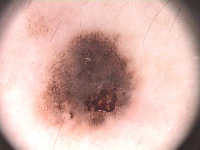</td><td>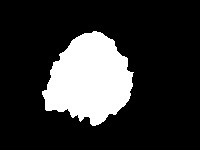</td></tr></table>

2. Разархивируем .rar файл.
3. Обратите внимание, что папка  `PH2 Dataset images` должна лежать там же где и ipynb notebook.

Это фотографии двух типов **поражений кожи:** меланома и родинки.
В данном задании мы не будем заниматься их классификацией, а будем **сегментировать** их.

In [ ]:
!wget -c https://www.dropbox.com/s/lm8wweoerz3m476/PH2Dataset.rar

--2022-12-05 20:55:38--  https://www.dropbox.com/s/lm8wweoerz3m476/PH2Dataset.rar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/lm8wweoerz3m476/PH2Dataset.rar [following]
--2022-12-05 20:55:38--  https://www.dropbox.com/s/raw/lm8wweoerz3m476/PH2Dataset.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbbce1cee776dd47401e3347fc6.dl.dropboxusercontent.com/cd/0/inline/ByGAP5k1Qy9_4rZLnOcsTklISpm-f14NDcRm-s19bohJwYWueADbzDnSsCWvQfJjOI1LtZ3ECqTep4FBF7_8tAEYxfRwmYAQLEz3RYD1v3BGAuERtn3E422hbOlz3Ob5dgE5Z-CU7Dzwx2eelPGXKy-D5Oc2jz8cJc68WsPt2g8lxw/file# [following]
--2022-12-05 20:55:39--  https://ucbbce1cee776dd47401e3347fc6.dl.dropboxusercontent.com/cd/0/inline/ByGAP5k1Qy9_4rZLnOcsTklISpm-f14NDcRm-s19bohJwYWueADbzDnSsCWvQfJjOI1LtZ3

In [ ]:
!ls

PH2Dataset.rar	sample_data


In [ ]:
!sudo apt-get install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.5.8-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [ ]:
get_ipython().system_raw("unrar x PH2Dataset.rar")

Стуктура датасета у нас следующая:

    IMD_002/
        IMD002_Dermoscopic_Image/
            IMD002.bmp
        IMD002_lesion/
            IMD002_lesion.bmp
        IMD002_roi/
            ...
    IMD_003/
        ...
        ...

 Здесь `X.bmp` — изображение, которое нужно сегментировать, `X_lesion.bmp` — результат сегментации.

Для загрузки датасета можно использовать skimage: [`skimage.io.imread()`](https://scikit-image.org/docs/dev/api/skimage.io.html)

In [ ]:
images = []
lesions = []
from skimage.io import imread
import os
root = 'PH2Dataset'

for root, dirs, files in os.walk(os.path.join(root, 'PH2 Dataset images')):
    if root.endswith('_Dermoscopic_Image'):
        images.append(imread(os.path.join(root, files[0])))
    if root.endswith('_lesion'):
        lesions.append(imread(os.path.join(root, files[0])))

Изображения имеют разные размеры. Давайте изменим их размер на $256\times256 $ пикселей. Для изменения размера изображений можно использовать [`skimage.transform.resize()`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize).
Эта функция также автоматически нормализует изображения в диапазоне $[0,1]$.


In [ ]:
from skimage.transform import resize
size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True,) for x in images]
Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]

In [ ]:
import numpy as np
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(X)} images')

Loaded 200 images


In [ ]:
len(images)

200

Чтобы убедиться, что все корректно, мы нарисуем несколько изображений

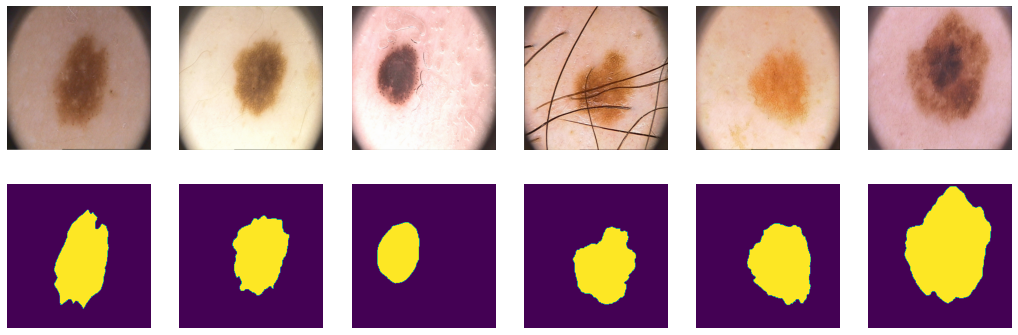

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[i])

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[i])
plt.show();

Разделим наши 200 картинок на 100/50/50
 для обучения, валидации и теста соответственно

In [ ]:
ix = np.random.choice(len(X), len(X), False)
tr, val, ts = np.split(ix, [100, 150])

In [ ]:
print(len(tr), len(val), len(ts))

100 50 50


#### PyTorch DataLoader

In [ ]:
from torch.utils.data import DataLoader
batch_size = 25
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])), 
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True)
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1), Y[ts, np.newaxis])),
                     batch_size=batch_size, shuffle=True)

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Реализация различных архитектур:
Ваше задание будет состоять в том, чтобы написать несколько нейросетевых архитектур для решения задачи семантической сегментации. Сравнить их по качеству на тесте и испробовать различные лосс функции для них.

-----------------------------------------------------------------------------------------

# SegNet [2 балла]

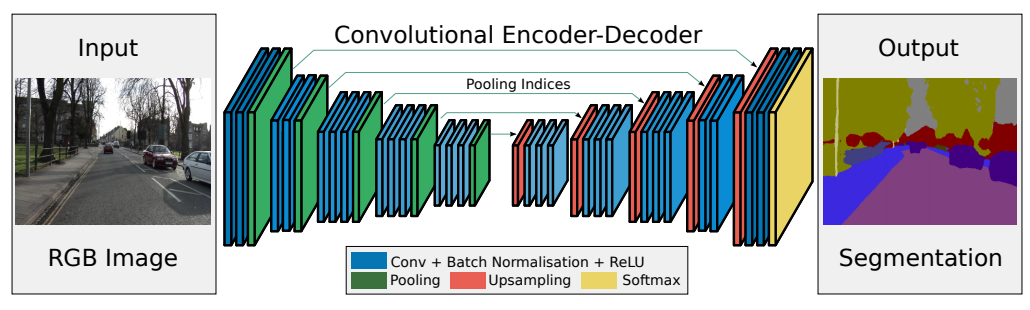

* Badrinarayanan, V., Kendall, A., & Cipolla, R. (2015). [SegNet: A deep convolutional
encoder-decoder architecture for image segmentation](https://arxiv.org/pdf/1511.00561.pdf)

Внимательно посмотрите из чего состоит модель и для чего выбраны те или иные блоки.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time

from matplotlib import rcParams
rcParams['figure.figsize'] = (15,4)

In [ ]:
class SegNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels = 3,
                      out_channels = 64,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 64,
                      out_channels = 64,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True)
        )
        
        self.pool0 = nn.MaxPool2d(kernel_size = 2,
                                  stride = 2,
                                  return_indices=True) # 256 -> 128
        
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels = 64,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 128,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True)
        )
        
        self.pool1 = nn.MaxPool2d(kernel_size = 2,
                                  stride = 2,
                                  return_indices=True)# 128 -> 64
        
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels = 128,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True)
        )
        
        self.pool2 =  nn.MaxPool2d(kernel_size = 2,
                                   stride = 2,
                                   return_indices=True) # 64 -> 32
        
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels = 256,
                      out_channels = 512,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 512,
                      out_channels = 512,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 512,
                      out_channels = 512,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True)
        )
        
        self.pool3 =  nn.MaxPool2d(kernel_size = 2,
                                   stride = 2,
                                   return_indices=True)# 32 -> 16

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels = 512,
                      out_channels = 1024,
                      kernel_size = 1),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 1024,
                      out_channels = 512,
                      kernel_size = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True)
        )

        # decoder (upsampling)
        self.upsample0 = nn.MaxUnpool2d(kernel_size = 2,
                                        stride = 2) # 16 -> 32
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels = 512,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True)
        )
        self.upsample1 = nn.MaxUnpool2d(kernel_size = 2,
                                        stride = 2) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels = 256,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 128,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 128,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True)
        )
        self.upsample2 = nn.MaxUnpool2d(kernel_size = 2,
                                        stride = 2)  # 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels = 128,
                      out_channels = 64,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 64,
                      out_channels = 64,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True)
        )
        self.upsample3 = nn.MaxUnpool2d(kernel_size = 2,
                                        stride = 2)  # 128 -> 256
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels = 64,
                      out_channels = 1,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(1),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 1,
                      out_channels = 1,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(1)
        )

    def forward(self, x):
        # encoder
        e0, ind0 = self.pool0(self.enc_conv0(x))
        e1, ind1 = self.pool1(self.enc_conv1(e0))
        e2, ind2 = self.pool2(self.enc_conv2(e1))
        e3, ind3 = self.pool3(self.enc_conv3(e2))

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(self.upsample0(b, ind3))
        d1 = self.dec_conv1(self.upsample1(d0, ind2))
        d2 = self.dec_conv2(self.upsample2(d1, ind1))
        d3 = self.dec_conv3(self.upsample3(d2, ind0)) # no activation
        return d3

## Метрика

В данном разделе предлагается использовать следующую метрику для оценки качества:

$I o U=\frac{\text {target } \cap \text { prediction }}{\text {target } \cup{prediction }}$

Пересечение (A ∩ B) состоит из пикселей, найденных как в маске предсказания, так и в основной маске истины, тогда как объединение (A ∪ B) просто состоит из всех пикселей, найденных либо в маске предсказания, либо в целевой маске.


Для примера посмотрим на истину (слева) и предсказание (справа):
![alt text](https://www.jeremyjordan.me/content/images/2018/05/target_prediction.png)


Тогда пересечение и объединение будет выглядеть так:

![alt text](https://www.jeremyjordan.me/content/images/2018/05/intersection_union.png)

In [ ]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    outputs = outputs.squeeze(1).byte()  # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0

    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0

    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds

    return thresholded 

## Функция потерь [1 балл]

Не менее важным, чем построение архитектуры, является определение **оптимизатора** и **функции потерь.**

Функция потерь - это то, что мы пытаемся минимизировать. Многие из них могут быть использованы для задачи бинарной семантической сегментации. 

Популярным методом для бинарной сегментации является *бинарная кросс-энтропия*, которая задается следующим образом:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Однако эта потеря страдает от проблем численной нестабильности. Самое главное, что $\lim_{x\rightarrow0}\log(x)=\infty$ приводит к неустойчивости в процессе оптимизации. Рекомендуется посмотреть следующее [упрощение](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits). Эта функция эквивалентна первой и не так подвержена численной неустойчивости:

$$\mathcal L_{BCE} = \hat y - y\hat y + \log\left(1+\exp(-\hat y)\right).$$

In [ ]:
def bce_loss(y_real, y_pred):
    loss = y_pred - y_real * y_pred + (1 + torch.exp(-y_pred)).log()
    return loss.mean()

## Тренировка [1 балл]

Мы определим цикл обучения в функции, чтобы мы могли повторно использовать его.

In [ ]:
def train(model, opt, loss_fn, epochs, data_tr, data_val, score_fn):
    X_val, Y_val = next(iter(data_val))
    train_loss_hstry = []
    val_loss_hstry = []
    scores_train = []
    scores_val = []
    for epoch in range(epochs):
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))

        avg_loss = 0
        loss_val = 0
        
        model.train()  # train mode
        for X_batch, Y_batch in data_tr:
            # data to device
            X_batch = X_batch.to(device)
            Y_batch = Y_batch.to(device)

            # set parameter gradients to zero
            opt.zero_grad()
            # forward
            Y_pred = model(X_batch)
            loss = loss_fn(Y_batch, Y_pred) # forward-pass
            
            loss.backward() # backward-pass
            opt.step()  # update weights
            
            # calculate loss to show the user
            avg_loss += loss / len(data_tr)
        toc = time()
        print('loss: %f' % avg_loss)
        train_loss_hstry.append(avg_loss.item())
        
        avg_score_train = score_fn(model, iou_pytorch, data_tr)
        scores_train.append(avg_score_train)
        # show intermediate results
        model.eval()  # testing mode
        
        for X_val, Y_val in data_val:
            with torch.no_grad():
                Y_hat = model(X_val.to(device)).detach().cpu()
                loss = loss_fn(Y_val, Y_hat)
                loss_val += loss / len(data_val)
        val_loss_hstry.append(loss_val.item())
        
        avg_score_val = score_fn(model, iou_pytorch, data_val)
        scores_val.append(avg_score_val)
        # Visualize tools
        clear_output(wait=True)
        for k in range(6):
            plt.subplot(2, 6, k+1)
            plt.imshow(np.rollaxis(X_val[k].numpy(), 0, 3), cmap='gray')
            plt.title('Real')
            plt.axis('off')

            plt.subplot(2, 6, k+7)
            plt.imshow(Y_hat[k, 0], cmap='gray')
            plt.title('Output')
            plt.axis('off')
        plt.suptitle('%d / %d - loss: %f' % (epoch+1, epochs, avg_loss))
        plt.show()
    return train_loss_hstry, val_loss_hstry, scores_train, scores_val

## Инференс [1 балл]

После обучения модели эту функцию можно использовать для прогнозирования сегментации на новых данных:

In [ ]:
def predict(model, data):
    model.eval()  # testing mode
    Y_pred = [X_batch for X_batch, _ in data]
    return np.array(Y_pred)

In [ ]:
def score_model(model, metric, data):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        Y_pred = model(X_batch.to(device)).sigmoid()
        Y_pred = torch.ones_like(Y_pred) * (Y_pred > 0.5)
        scores += metric(Y_pred, Y_label.to(device)).mean().item()
    return scores/len(data)

In [ ]:
def plot_items(model, loader, cnt):

    model.eval()
    X, Y = next(iter(loader))
    X = X.to(device)
    Y_pred = model(X)

    p = Y_pred.detach().cpu()
    p_post = torch.ones_like(p) * (p > 0.1)
    y = Y
    
    plt.figure(figsize=(15, 10))
    for i in range(cnt):
        plt.subplot(3, cnt, i+1+cnt*0)
        plt.imshow(np.rollaxis(p[i,0].numpy(), 0), cmap='gray')
        plt.title('Output')
        plt.axis('off')
        
        plt.subplot(3, cnt, i+1+cnt*1)
        plt.imshow(np.rollaxis(p_post[i,0].numpy(), 0), cmap='gray')
        plt.title('Post-processing')
        plt.axis('off')

        plt.subplot(3, cnt, i+1+cnt*2)
        plt.imshow(np.rollaxis(y[i,0].numpy(), 0), cmap='gray')
        plt.title('Real')
        plt.axis('off')

## Основной момент: обучение

Обучите вашу модель. Обратите внимание, что обучать необходимо до сходимости. Если указанного количества эпох (20) не хватило, попробуйте изменять количество эпох до сходимости алгоритма. Сходимость определяйте по изменению функции потерь на валидационной выборке.
 С параметрами оптимизатора можно спокойно играть, пока вы не найдете лучший вариант для себя.


In [ ]:
model = SegNet().to(device)

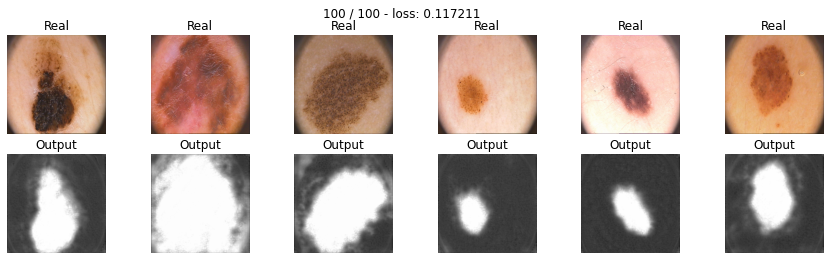

In [ ]:
max_epochs = 100
optim_bce = torch.optim.AdamW(model.parameters(), lr = 1e-2, weight_decay = 0.05)
bce_SegNet_train_loss, bce_SegNet_val_loss, bce_SegNet_train_score, bce_SegNet_val_score = train(model, optim_bce, bce_loss, max_epochs, data_tr, data_val, score_model)

In [ ]:
torch.save(model, 'BCE_Loss.pt')

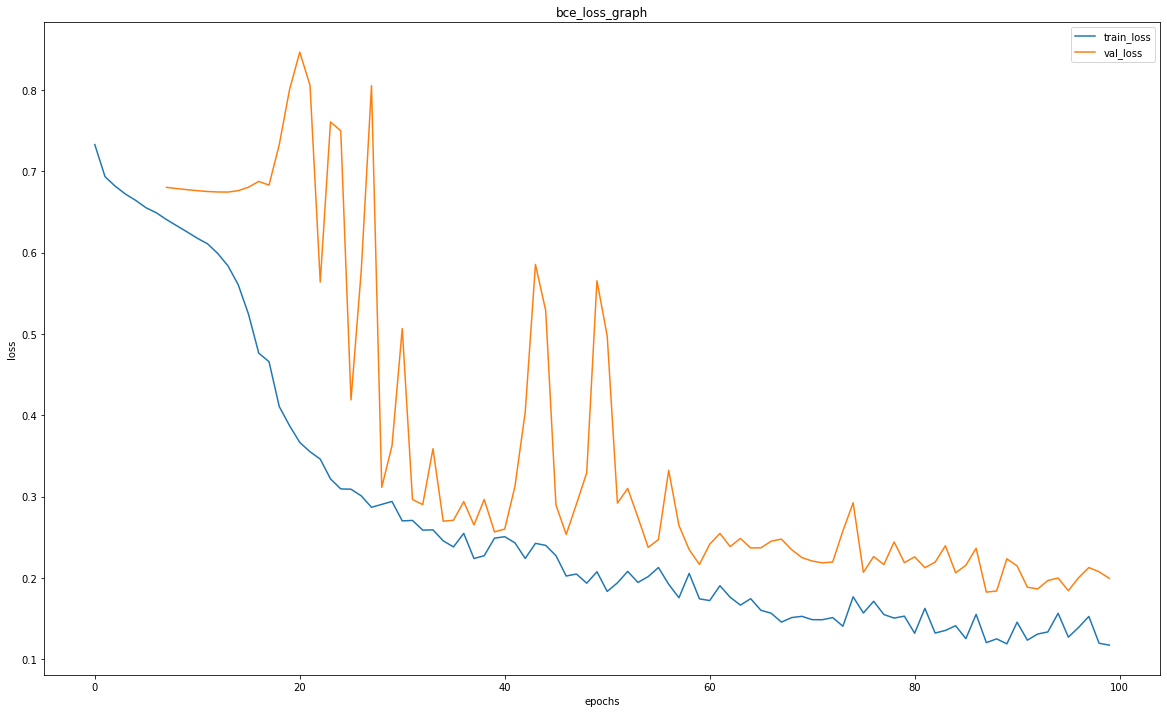

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_SegNet_train_loss, label="train_loss")
plt.plot(bce_SegNet_val_loss, label="val_loss")

plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("bce_loss_graph")
plt.show()

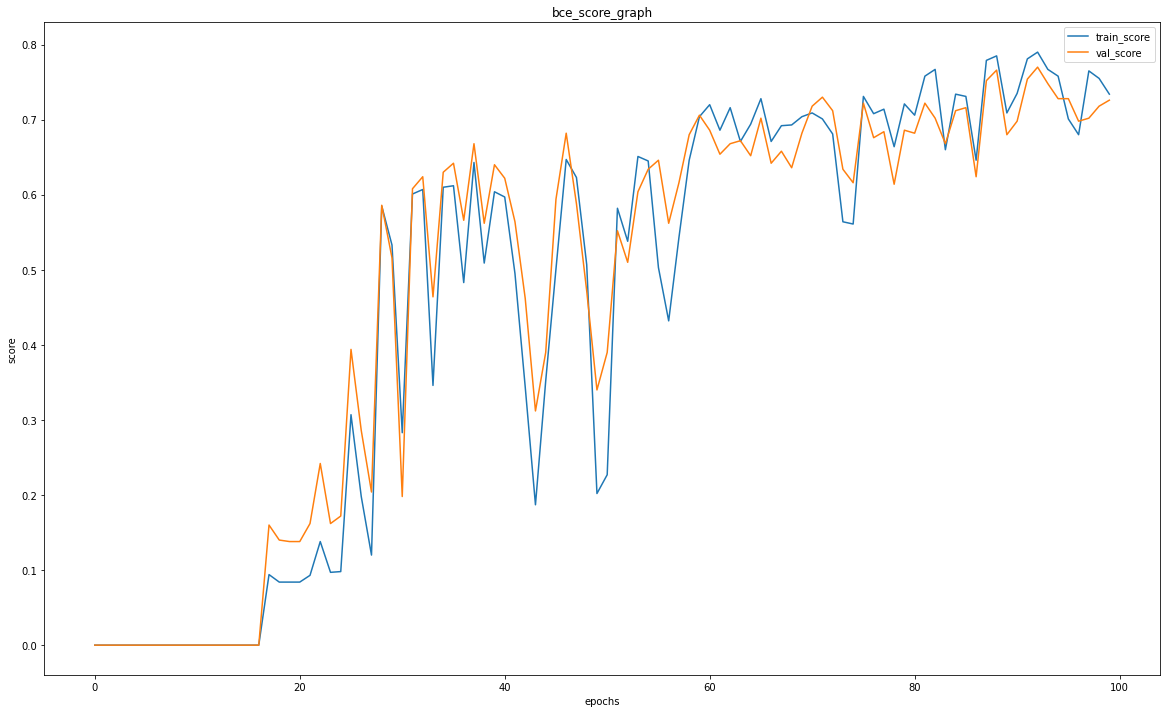

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_SegNet_train_score, label="train_score")
plt.plot(bce_SegNet_val_score, label="val_score")

plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("score")
plt.title("bce_score_graph")
plt.show()

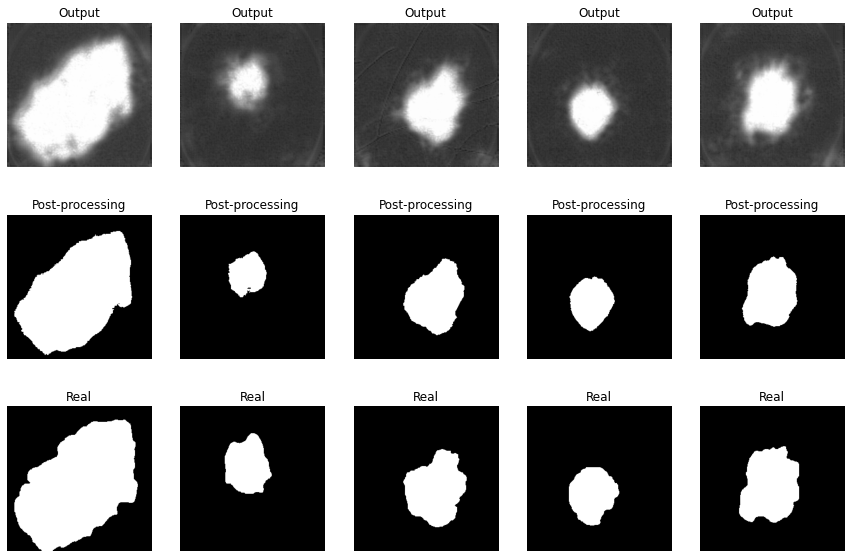

In [ ]:
plot_items(model, data_ts, 5)

In [ ]:
print(f"val:{score_model(model, iou_pytorch, data_val)}\ntest:{score_model(model, iou_pytorch, data_ts)}")

val:0.7260000109672546
test:0.6960000097751617


Ответьте себе на вопрос: не переобучается ли моя модель?

Показатель лосса на трейне выходит на плато. Но показатель метрики ведет себя похожим образом на трейне и валидационном датасете. Модель немного переобучается в связи с тем, что выборка слишком маленькая.

-----------------------------------------------------------------------------------------

## Дополнительные функции потерь [2 балла] 

 В данном разделе вам потребуется имплементировать две функции потерь:
 DICE и Focal loss. 
 Если у вас что-то не учится, велика вероятность, что вы ошиблись или учите слишком мало эпох, прежде чем бить тревогу попробуйте перебрать различные варианты и убедитесь, что во всех других сетапах сеть достигает желанного результата. СПОЙЛЕР: учиться она будет при всех лоссах, предложенных в этом задании.


**1. Dice coefficient:** Учитывая две маски $X$ и $Y$, общая метрика для измерения расстояния между этими двумя масками задается следующим образом:

$$D(X,Y)=\frac{2|X\cap Y|}{|X|+|Y|}$$

Эта функция не является дифференцируемой, но это необходимое свойство для градиентного спуска. В данном случае мы можем приблизить его с помощью:

$$\mathcal L_D(X,Y) = 1-\frac{1}{256 \times 256} \times \frac{\sum_i2X_iY_i}{\sum_iX_i+Y_i}.$$

Не забудьте подумать о численной нестабильности, возникающей в математической формуле.


In [ ]:
def dice_loss(y_real, y_pred):
    outp = y_pred.sigmoid().squeeze(1)
    labels = y_real.squeeze(1)
    
    eps = 1e-7 # eps is added for numerical stability
    
    sum_1 = (labels + outp).sum() + eps
    mult_1 = (2 * outp * labels).sum() + eps
    
    res = 1 - (mult_1/sum_1).mean()
    return res 

Проводим тестирование:

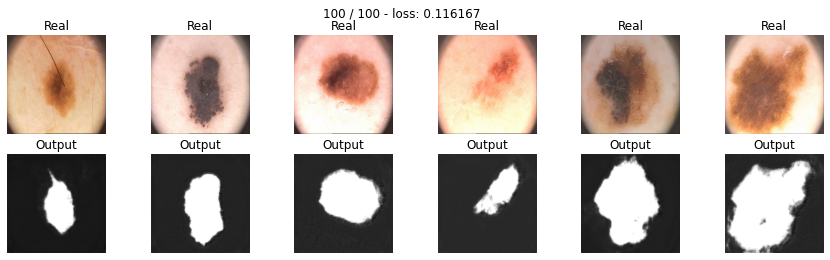

In [ ]:
model_dice = SegNet().to(device)

max_epochs = 100
optimaizer = torch.optim.AdamW(model_dice.parameters(), lr = 1e-2, weight_decay = 0.05)
dice_SegNet_train_loss, dice_SegNet_val_loss, dice_SegNet_train_score, dice_SegNet_val_score = train(model_dice, optimaizer, dice_loss, max_epochs, data_tr, data_val, score_model)

In [ ]:
torch.save(model_dice, 'DICE_Loss.pt')

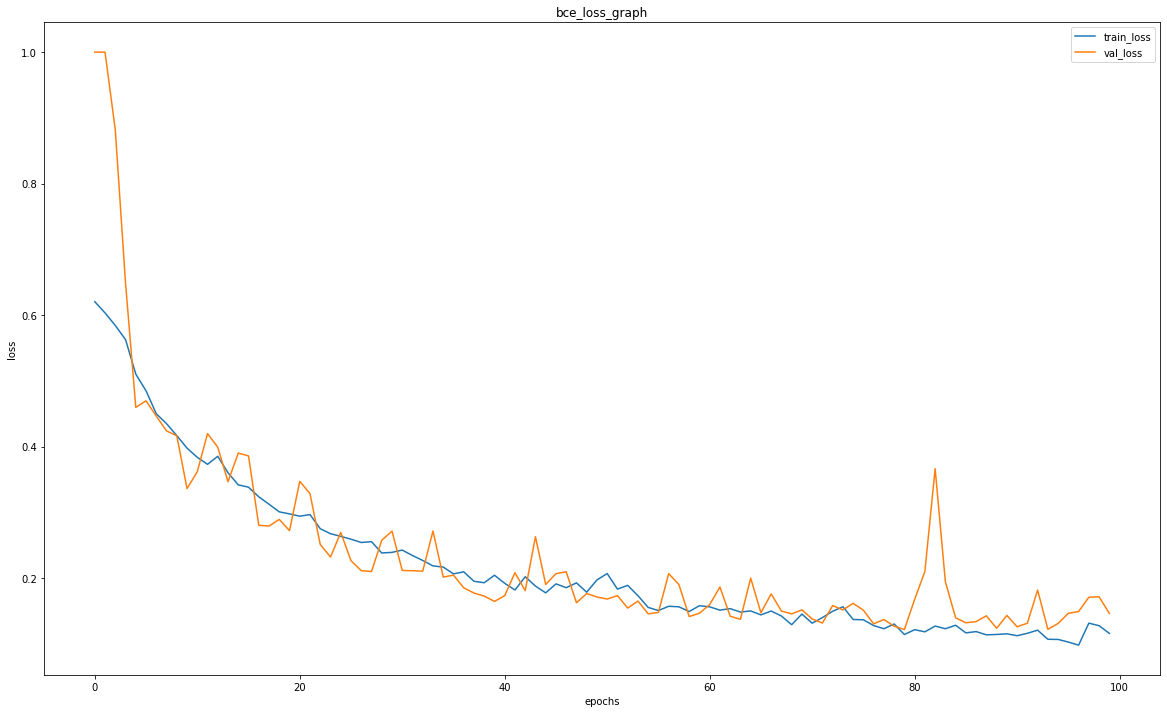

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(dice_SegNet_train_loss, label="train_loss")
plt.plot(dice_SegNet_val_loss, label="val_loss")

plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("bce_loss_graph")
plt.show()

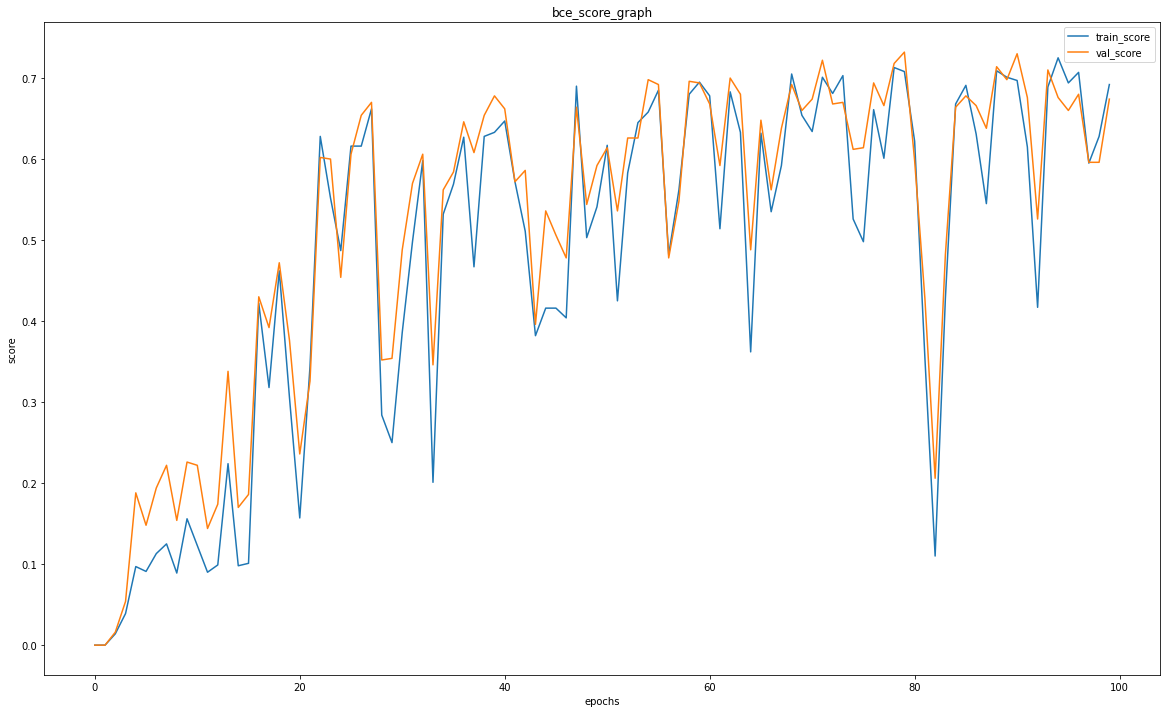

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(dice_SegNet_train_score, label="train_score")
plt.plot(dice_SegNet_val_score, label="val_score")

plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("score")
plt.title("bce_score_graph")
plt.show()

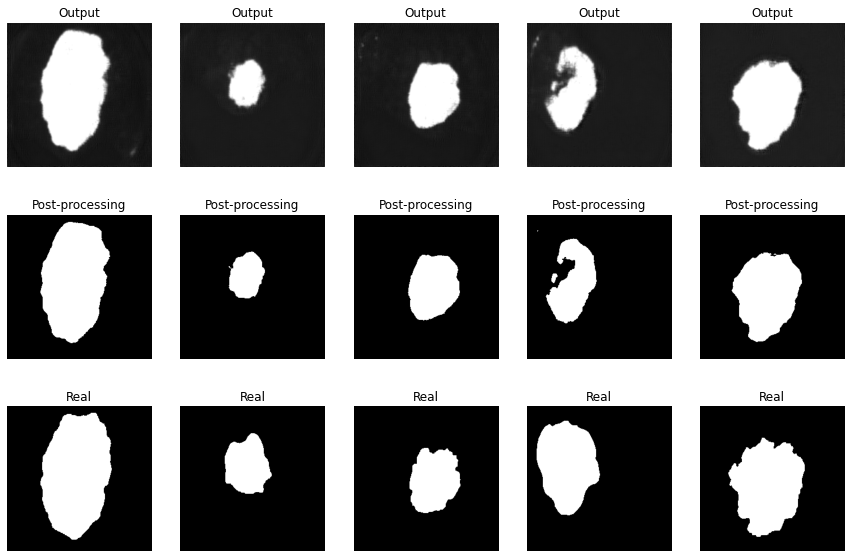

In [ ]:
plot_items(model_dice, data_ts, 5)

In [ ]:
print(f"val:{score_model(model_dice, iou_pytorch, data_val)}\ntest:{score_model(model_dice, iou_pytorch, data_ts)}")

val:0.6739999949932098
test:0.6380000114440918


[**2. Focal loss:**](https://arxiv.org/pdf/1708.02002.pdf) 

Окей, мы уже с вами умеем делать BCE loss:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Проблема с этой потерей заключается в том, что она имеет тенденцию приносить пользу классу **большинства** (фоновому) по отношению к классу **меньшинства** ( переднему). Поэтому обычно применяются весовые коэффициенты к каждому классу:

$$\mathcal L_{wBCE}(y, \hat y) = -\sum_i \alpha_i\left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Традиционно вес $\alpha_i$ определяется как обратная частота класса этого пикселя $i$, так что наблюдения миноритарного класса весят больше по отношению к классу большинства.

Еще одним недавним дополнением является взвешенный пиксельный вариант, которая взвешивает каждый пиксель по степени уверенности, которую мы имеем в предсказании этого пикселя.

$$\mathcal L_{focal}(y, \hat y) = -\sum_i \left[\left(1-\sigma(\hat y_i)\right)^\gamma y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Зафиксируем значение $\gamma=2$.

--------------------------------------------------------------------------------


In [ ]:
def focal_loss(y_real, y_pred, eps = 1e-8, gamma = 2):
    outp = y_pred.sigmoid() + eps
    label = y_real
    loss = -((1-outp)**gamma*label*outp.log()+(1-label)*(1-outp).log())
    return loss.mean()


In [ ]:
model_focal = SegNet().to(device)

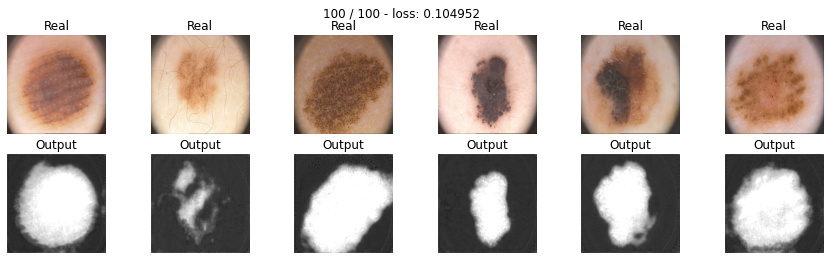

In [ ]:
max_epochs = 100
optimaizer_foc = torch.optim.AdamW(model_focal.parameters(), lr = 1e-2, weight_decay = 0.05)
foc_SegNet_train_loss, foc_SegNet_val_loss, foc_SegNet_train_score, foc_SegNet_val_score = train(model_focal, optimaizer_foc, focal_loss, max_epochs, data_tr, data_val, score_model)

In [ ]:
torch.save(model_focal, 'FOCAL_Loss.pt')

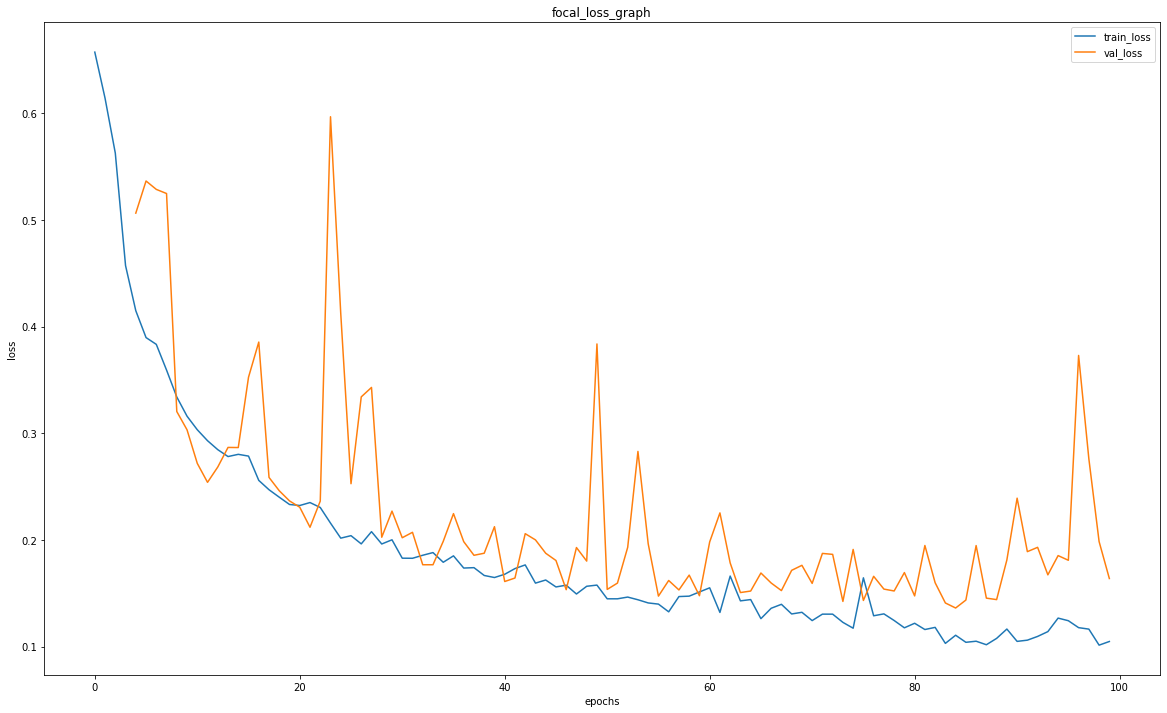

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(foc_SegNet_train_loss, label="train_loss")
plt.plot(foc_SegNet_val_loss, label="val_loss")

plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("focal_loss_graph")
plt.show()

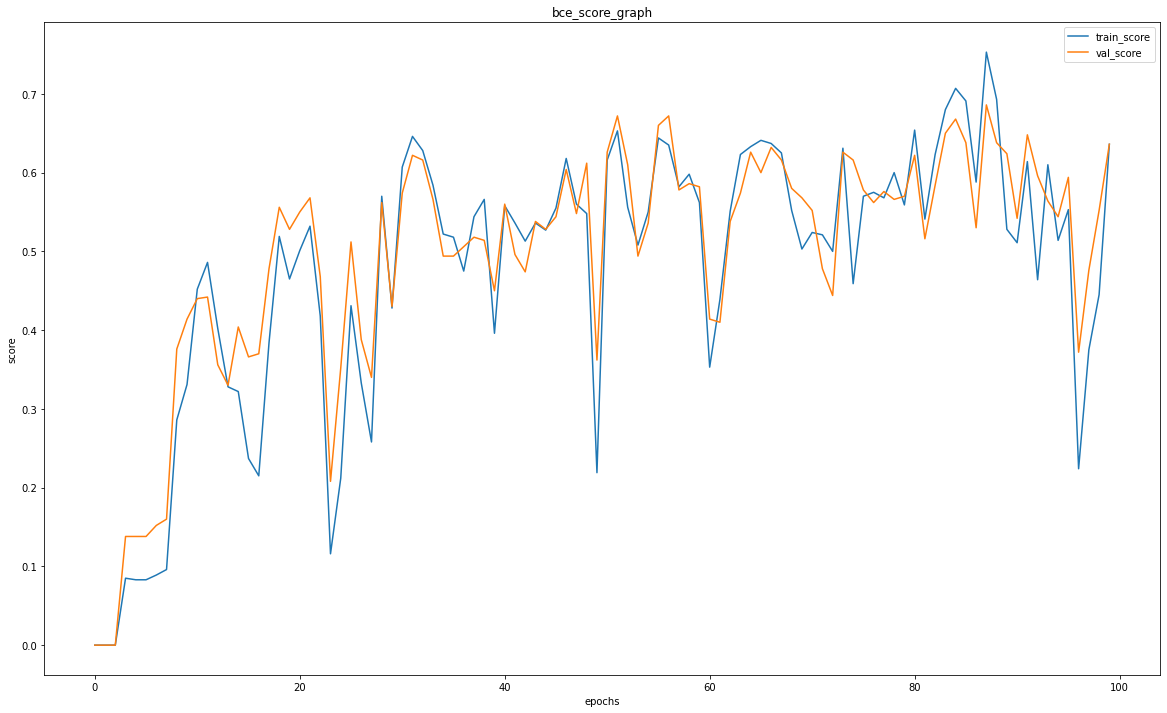

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(foc_SegNet_train_score, label="train_score")
plt.plot(foc_SegNet_val_score, label="val_score")

plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("score")
plt.title("bce_score_graph")
plt.show()

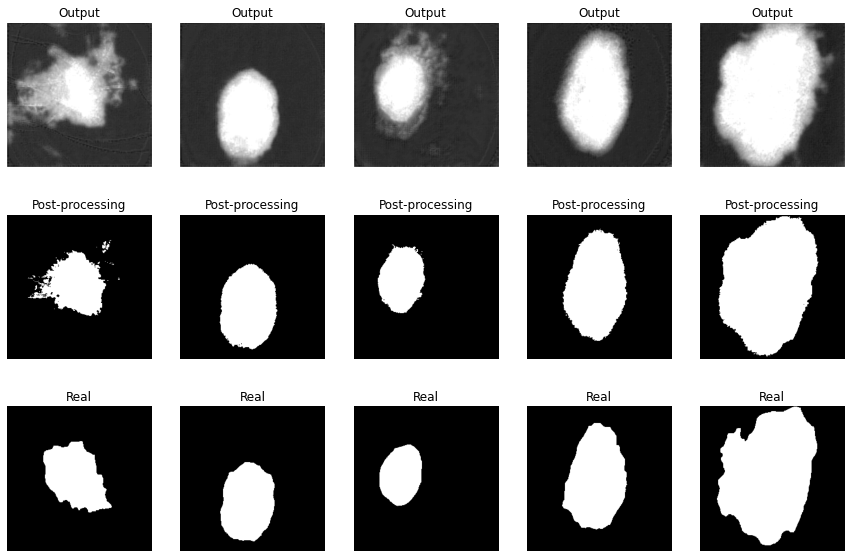

In [ ]:
plot_items(model_focal, data_ts, 5)

In [ ]:
print(f"val:{score_model(model_focal, iou_pytorch, data_val)}\ntest:{score_model(model_focal, iou_pytorch, data_ts)}")

val:0.6359999477863312
test:0.6240000128746033


foc_train_loss----------------------------------------------------------------------------------------------

## [BONUS] Мир сегментационных лоссов [5 баллов]

В данном блоке предлагаем вам написать одну функцию потерь самостоятельно. Для этого необходимо прочитать статью и имплементировать ее. Кроме тако провести численное сравнение с предыдущими функциями.
Какие варианты? 

1) Можно учесть Total Variation
2) Lova
3) BCE но с Soft Targets (что-то типа label-smoothing для многослассовой классификации)
4) Любой другой 

* [Physiological Inspired Deep Neural Networks for Emotion Recognition](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8472816&tag=1)". IEEE Access, 6, 53930-53943.

* [Boundary loss for highly unbalanced segmentation](https://arxiv.org/abs/1812.07032)

* [Tversky loss function for image segmentation using 3D fully convolutional deep networks](https://arxiv.org/abs/1706.05721)

* [Correlation Maximized Structural Similarity Loss for Semantic Segmentation](https://arxiv.org/abs/1910.08711)

* [Topology-Preserving Deep Image Segmentation](https://papers.nips.cc/paper/8803-topology-preserving-deep-image-segmentation)

Так как Тверский лосс очень похож на данные выше, то за него будет проставлено только 3 балла (при условии, если в модели нет ошибок при обучении). Постарайтесь сделать что-то интереснее.

In [ ]:
def similarity_loss(y_pred, y_real, eps=1e-8):
    covariance = ((y_pred - y_pred.mean()) * (y_real - y_real.mean())).sum() / (y_pred.view(-1).shape.numel() + y_real.view(-1).shape.numel())
    res = (torch.var(y_pred) + torch.var(y_real) - 2 * covariance) / (torch.var(y_pred) + torch.var(y_real) + eps)
    return res

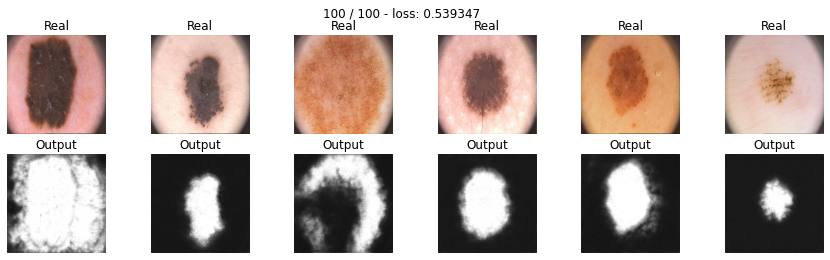

In [ ]:
model_sim = SegNet().to(device)

max_epochs = 100
optimaizer_sim = torch.optim.AdamW(model_sim.parameters(), lr = 1e-2, weight_decay = 0.05)
sim_SegNet_train_loss, sim_SegNet_val_loss, sim_SegNet_train_score, sim_SegNet_val_score = train(model_sim, optimaizer_sim, similarity_loss, max_epochs, data_tr, data_val, score_model)

In [ ]:
torch.save(model_sim, 'SIM_Loss.pt')

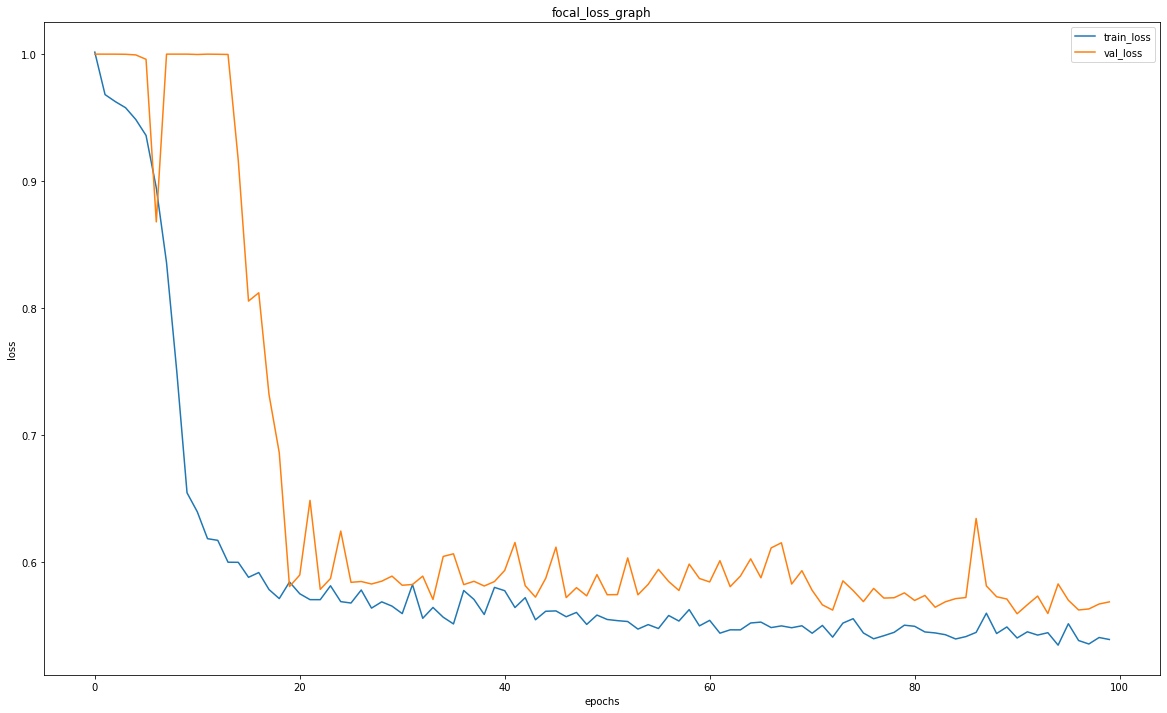

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(sim_SegNet_train_loss, label="train_loss")
plt.plot(sim_SegNet_val_loss, label="val_loss")

plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("focal_loss_graph")
plt.show()

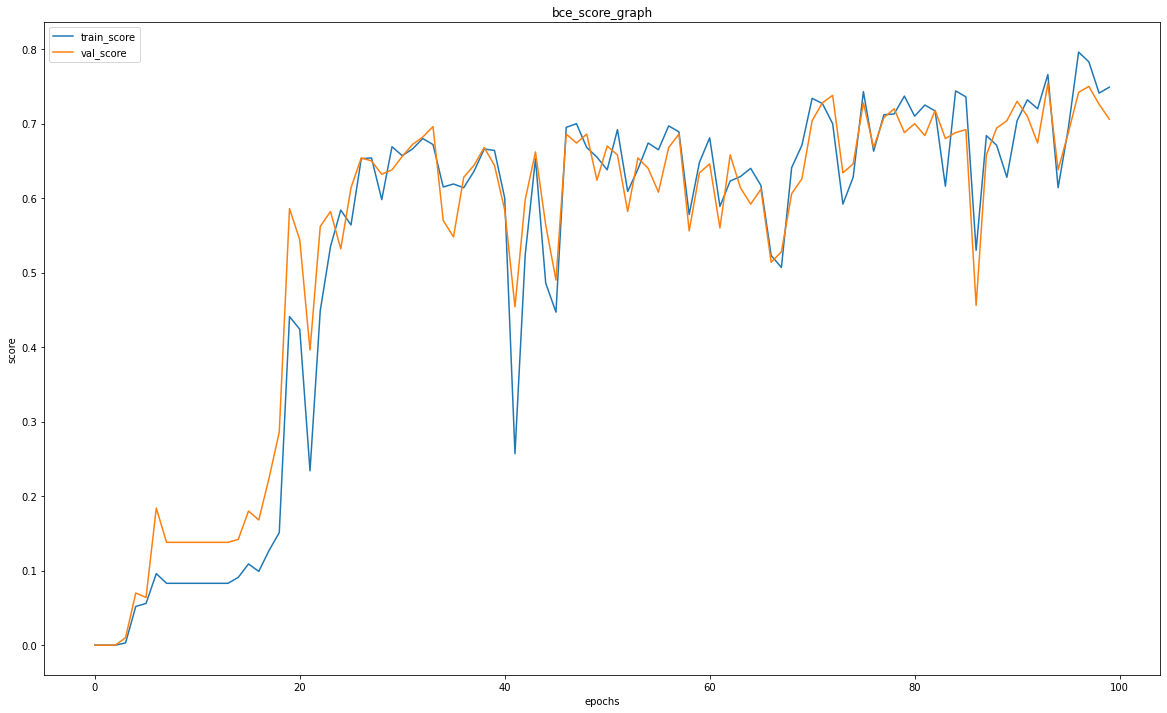

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(sim_SegNet_train_score, label="train_score")
plt.plot(sim_SegNet_val_score, label="val_score")

plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("score")
plt.title("bce_score_graph")
plt.show()

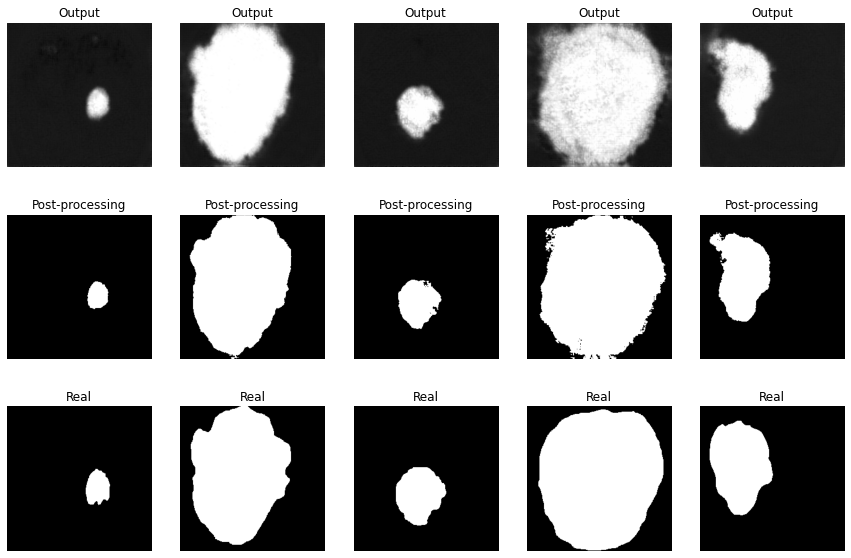

In [ ]:
plot_items(model_sim, data_ts, 5)

In [ ]:
print(f"val:{score_model(model_sim, iou_pytorch, data_val)}\ntest:{score_model(model_sim, iou_pytorch, data_ts)}")

val:0.7060000002384186
test:0.6839999556541443


-----------------------------------------------------------------------------------------

# U-Net [2 балла]

[**U-Net**](https://arxiv.org/abs/1505.04597) — это архитектура нейронной сети, которая получает изображение и выводит его. Первоначально он был задуман для семантической сегментации (как мы ее будем использовать), но он настолько успешен, что с тех пор используется в других контекстах. Получая на вход медицинское изображение, он выведет изображение в оттенках серого, где интенсивность каждого пикселя зависит от вероятности того, что этот пиксель принадлежит интересующей нас области.

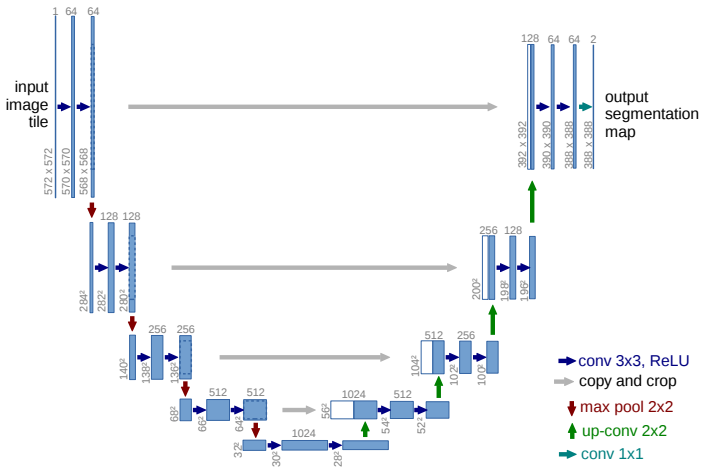

У нас в архитектуре все так же существует энкодер и декодер, как в **SegNet**, но отличительной особеностью данной модели являются *skip-conenctions*, соединяющие части декодера и энкодера. То есть для того чтобы передать на вход декодера тензор, мы конкатенируем симметричный выход с энкодера и выход предыдущего слоя декодера.

* Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "[U-Net: Convolutional networks for biomedical image segmentation.](https://arxiv.org/pdf/1505.04597.pdf)" International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

In [ ]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),
        # )
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels = 3,
                      out_channels = 64,
                      kernel_size = 3,
                      padding= 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 64,
                      out_channels = 64,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True)
        )
        self.pool0 = nn.MaxPool2d(kernel_size=2,
                                  stride=2,
                                  return_indices=True)   # 256 -> 128
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=64,
                      out_channels=128,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 128,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True)
            
        )
        self.pool1 = nn.MaxPool2d(kernel_size=2,
                                  stride=2,
                                  return_indices=True) # 128 -> 64
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128,
                      out_channels=256,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True)            
        )
        self.pool2 = nn.MaxPool2d(kernel_size=2,
                                  stride=2,
                                  return_indices=True) # 64 -> 32
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256,
                      out_channels=512,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 512,
                      out_channels = 512,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 512,
                      out_channels = 512,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True)            
        )
        self.pool3 = nn.MaxPool2d(kernel_size=2,
                                  stride=2,
                                  return_indices=True) # 32 -> 16

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels=512,
                      out_channels=1024,
                      kernel_size=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels=1024,
                      out_channels=512,
                      kernel_size=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True)
        )

        # decoder (upsampling)
        self.upsample0 = nn.MaxUnpool2d(kernel_size=2,
                                        stride=2) # 16 -> 32
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=512*2,
                      out_channels=256,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True)            
        )
        self.upsample1 = nn.MaxUnpool2d(kernel_size=2,
                                        stride=2) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=256*2,
                      out_channels=128,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 128,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 128,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True)            
        ) 
        self.upsample2 = nn.MaxUnpool2d(kernel_size=2,
                                        stride=2)  # 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128*2,
                      out_channels=64,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 64,
                      out_channels = 64,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True)            
        ) 
        self.upsample3 = nn.MaxUnpool2d(kernel_size=2,
                                        stride=2)  # 128 -> 256
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64*2,
                      out_channels=1,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(1),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 1,
                      out_channels = 1,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(1),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 1,
                      out_channels = 1,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(1)
        ) 

    def forward(self, x):
        # encoder
        e0_conv = self.enc_conv0(x)
        e0, ind0 = self.pool0(e0_conv)
        e1_conv = self.enc_conv1(e0)
        e1, ind1 = self.pool1(e1_conv)
        e2_conv = self.enc_conv2(e1)
        e2, ind2 = self.pool2(e2_conv)
        e3_conv = self.enc_conv3(e2)
        e3, ind3 = self.pool3(e3_conv)

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(torch.cat([self.upsample0(b, ind3), e3_conv], 1))
        d1 = self.dec_conv1(torch.cat([self.upsample1(d0, ind2), e2_conv], 1))
        d2 = self.dec_conv2(torch.cat([self.upsample2(d1, ind1), e1_conv], 1))
        d3 = self.dec_conv3(torch.cat([self.upsample3(d2, ind0), e0_conv], 1))  # no activation
        return d3

In [ ]:
bce_unet_model = UNet().to(device)

In [ ]:
dice_unet_model = UNet().to(device)

In [ ]:
focal_unet_model = UNet().to(device)

In [ ]:
sim_unet_model = UNet().to(device)

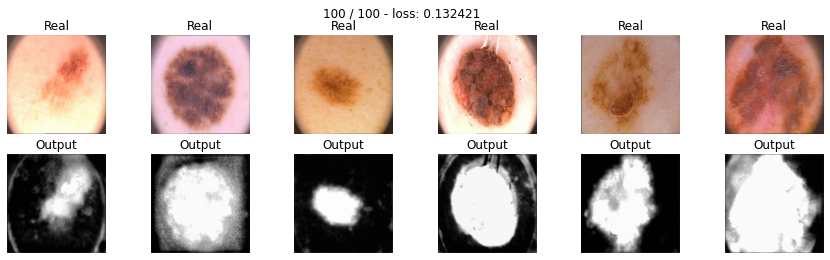

In [ ]:
bce_unet_train_loss, bce_unet_val_loss, bce_unet_train_score, bce_unet_val_score = train(bce_unet_model, optim.AdamW(bce_unet_model.parameters(), lr = 1e-2, weight_decay=0.05), bce_loss, 100, data_tr, data_val, score_model)

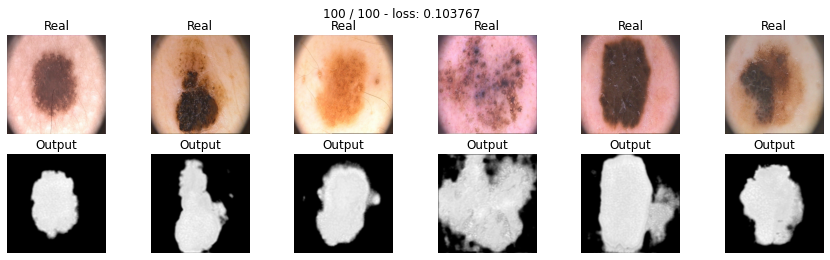

In [ ]:
dice_unet_train_loss, dice_unet_val_loss, dice_unet_train_score, dice_unet_val_score = train(dice_unet_model, optim.AdamW(dice_unet_model.parameters(), lr = 1e-2, weight_decay=0.05), dice_loss, 100, data_tr, data_val, score_model)

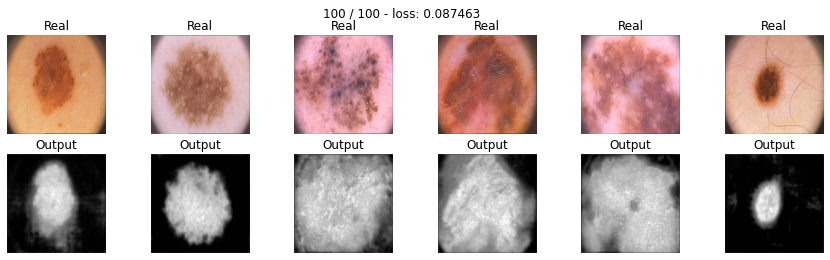

In [ ]:
focal_unet_train_loss, focal_unet_val_loss, focal_unet_train_score, focal_unet_val_score= train(focal_unet_model, optim.AdamW(focal_unet_model.parameters(), lr = 1e-2, weight_decay=0.05), focal_loss, 100, data_tr, data_val, score_model)

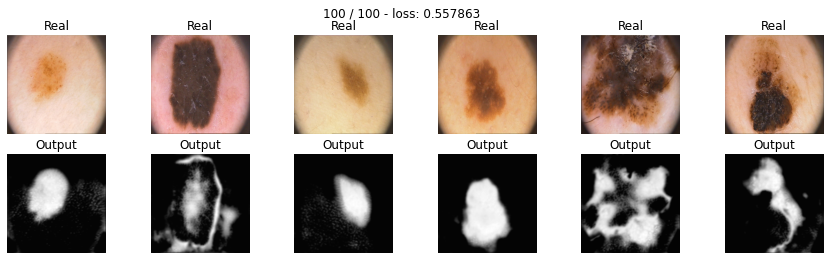

In [ ]:
sim_unet_train_loss, sim_unet_val_loss, sim_unet_train_score, sim_unet_val_score = train(sim_unet_model, optim.AdamW(sim_unet_model.parameters(), lr = 1e-2, weight_decay=0.05), similarity_loss, 100, data_tr, data_val, score_model)

In [ ]:
print(f"BCE:\nval:{score_model(bce_unet_model, iou_pytorch, data_val)}\ntest:{score_model(bce_unet_model, iou_pytorch, data_ts)}")

BCE:
val:0.6859999597072601
test:0.629999965429306


In [ ]:
print(f"DICE:\nval:{score_model(dice_unet_model, iou_pytorch, data_val)}\ntest:{score_model(dice_unet_model, iou_pytorch, data_ts)}")

DICE:
val:0.7359999716281891
test:0.7359999716281891


In [ ]:
print(f"Focal:\nval:{score_model(focal_unet_model, iou_pytorch, data_val)}\ntest:{score_model(focal_unet_model, iou_pytorch, data_ts)}")

Focal:
val:0.6500000059604645
test:0.6060000061988831


In [ ]:
print(f"Sim:\nval:{score_model(sim_unet_model, iou_pytorch, data_val)}\ntest:{score_model(sim_unet_model, iou_pytorch, data_ts)}")

Sim:
val:0.5040000081062317
test:0.3440000116825104


Новая модель путем изменения типа пулинга:

 **Max-Pooling** for the downsampling and **nearest-neighbor Upsampling** for the upsampling.

Down-sampling:

        conv = nn.Conv2d(3, 64, 3, padding=1)
        pool = nn.MaxPool2d(3, 2, padding=1)

Up-Sampling

        upsample = nn.Upsample(32)
        conv = nn.Conv2d(64, 64, 3, padding=1)

Замените max-pooling на convolutions с stride=2 и upsampling на transpose-convolutions с stride=2.


In [ ]:
class UNet2(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),
        # )
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels = 3,
                      out_channels = 64,
                      kernel_size = 3,
                      padding= 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 64,
                      out_channels = 64,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True)
        )
        self.pool0 = nn.Conv2d(in_channels=64,
                               out_channels=64,
                               kernel_size=3,
                               stride=2,
                               padding=1)  # 256 -> 128
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=64,
                      out_channels=128,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 128,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True)
            
        )
        self.pool1 = nn.Conv2d(in_channels=128,
                               out_channels=128,
                               kernel_size=3,
                               stride=2,
                               padding=1)  # 128 -> 64
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128,
                      out_channels=256,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True)            
        )
        self.pool2 = nn.Conv2d(in_channels=256,
                               out_channels=256,
                               kernel_size=3,
                               stride=2,
                               padding=1)  # 64 -> 32
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=256,
                      out_channels=512,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 512,
                      out_channels = 512,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 512,
                      out_channels = 512,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True)            
        )
        self.pool3 = nn.Conv2d(in_channels=512,
                               out_channels=512,
                               kernel_size=3,
                               stride=2,
                               padding=1)  # 32 -> 16

        # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels=512,
                      out_channels=1024,
                      kernel_size=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels=1024,
                      out_channels=512,
                      kernel_size=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace = True)
        )

        # decoder (upsampling)
        self.upsample0 = nn.ConvTranspose2d(in_channels=512,
                                            out_channels=512,
                                            stride=2,
                                            kernel_size=3,
                                            padding=1) # 16 -> 32
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=512*2,
                      out_channels=256,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 256,
                      out_channels = 256,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace = True)            
        )
        self.upsample1 = nn.ConvTranspose2d(in_channels=256,
                                            out_channels=256,
                                            stride=2,
                                            kernel_size=3,
                                            padding=1) # 32 -> 64
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=256*2,
                      out_channels=128,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 128,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 128,
                      out_channels = 128,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace = True)            
        ) 
        self.upsample2 = nn.ConvTranspose2d(in_channels=128,
                                            out_channels=128,
                                            stride=2,
                                            kernel_size=3,
                                            padding=1)  # 64 -> 128
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128*2,
                      out_channels=64,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 64,
                      out_channels = 64,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace = True)            
        ) 
        self.upsample3 = nn.ConvTranspose2d(in_channels=64,
                                            out_channels=64,
                                            stride=2,
                                            kernel_size=3,
                                            padding=1)   # 128 -> 256
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64*2,
                      out_channels=1,
                      kernel_size=3,
                      padding = 1),
            nn.BatchNorm2d(1),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 1,
                      out_channels = 1,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(1),
            nn.ReLU(inplace = True),
            nn.Conv2d(in_channels = 1,
                      out_channels = 1,
                      kernel_size = 3,
                      padding = 1),
            nn.BatchNorm2d(1)
        ) 

    def forward(self, x):
        # encoder
        e0_conv = self.enc_conv0(x)
        e0 = self.pool0(e0_conv)
        e1_conv = self.enc_conv1(e0)
        e1 = self.pool1(e1_conv)
        e2_conv = self.enc_conv2(e1)
        e2 = self.pool2(e2_conv)
        e3_conv = self.enc_conv3(e2)
        e3 = self.pool3(e3_conv)

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(torch.cat([self.upsample0(b, output_size = e3_conv.size()), e3_conv], 1))
        d1 = self.dec_conv1(torch.cat([self.upsample1(d0, output_size = e2_conv.size()), e2_conv], 1))
        d2 = self.dec_conv2(torch.cat([self.upsample2(d1, output_size = e1_conv.size()), e1_conv], 1))
        d3 = self.dec_conv3(torch.cat([self.upsample3(d2, output_size = e0_conv.size()), e0_conv], 1))  # no activation
        return d3


In [ ]:
bce_unet2_model = UNet2().to(device)

In [ ]:
dice_unet2_model = UNet2().to(device)

In [ ]:
focal_unet2_model = UNet2().to(device)

In [ ]:
sim_unet2_model = UNet2().to(device)

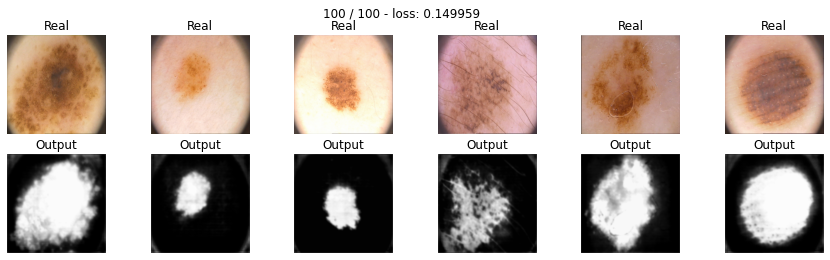

In [ ]:
bce_unet2_train_loss, bce_unet2_val_loss, bce_unet2_train_score, bce_unet2_val_score = train(bce_unet2_model, optim.AdamW(bce_unet2_model.parameters(), lr = 1e-2, weight_decay=0.05), bce_loss, 100, data_tr, data_val, score_model)

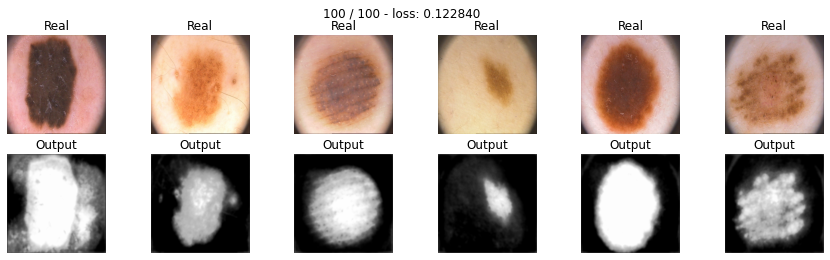

In [ ]:
focal_unet2_train_loss, focal_unet2_val_loss, focal_unet2_train_score, focal_unet2_val_score= train(focal_unet2_model, optim.AdamW(focal_unet2_model.parameters(), lr = 1e-2, weight_decay=0.05), focal_loss, 100, data_tr, data_val, score_model)

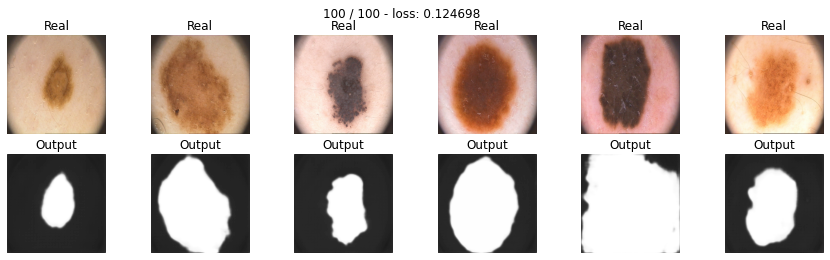

In [ ]:
dice_unet2_train_loss, dice_unet2_val_loss, dice_unet2_train_score, dice_unet2_val_score = train(dice_unet2_model, optim.AdamW(dice_unet2_model.parameters(), lr = 1e-2, weight_decay=0.05), dice_loss, 100, data_tr, data_val, score_model)

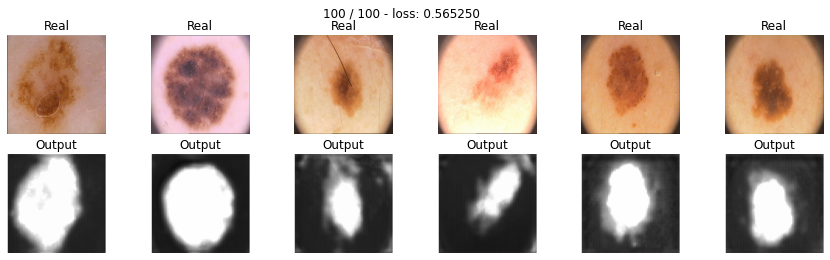

In [ ]:
sim_unet2_train_loss, sim_unet2_val_loss, sim_unet2_train_score, sim_unet2_val_score = train(sim_unet2_model, optim.AdamW(sim_unet2_model.parameters(), lr = 1e-2, weight_decay=0.05), similarity_loss, 100, data_tr, data_val, score_model)

In [ ]:
print(f"BCE:\nval:{score_model(bce_unet2_model, iou_pytorch, data_val)}\ntest:{score_model(bce_unet2_model, iou_pytorch, data_ts)}")

BCE:
val:0.648000031709671
test:0.671999990940094


In [ ]:
print(f"DICE:\nval:{score_model(dice_unet2_model, iou_pytorch, data_val)}\ntest:{score_model(dice_unet2_model, iou_pytorch, data_ts)}")

DICE:
val:0.6739999949932098
test:0.6699999868869781


In [ ]:
print(f"Focal:\nval:{score_model(focal_unet2_model, iou_pytorch, data_val)}\ntest:{score_model(focal_unet2_model, iou_pytorch, data_ts)}")

Focal:
val:0.5260000228881836
test:0.4859999865293503


In [ ]:
print(f"Sim:\nval:{score_model(sim_unet2_model, iou_pytorch, data_val)}\ntest:{score_model(sim_unet2_model, iou_pytorch, data_ts)}")

Sim:
val:0.5120000243186951
test:0.39799998700618744


Сделайте вывод, какая из моделей лучше

Отчет (6 баллов): 
Ниже предлагается написать отчет о проделанно работе и построить графики для лоссов, метрик на валидации и тесте. 
Если вы пропустили какую-то часть в задании выше, то вы все равно можете получить основную часть баллов в отчете, если правильно зададите проверяемые вами гипотезы.


Аккуратно сравните модели между собой и соберите наилучшую архитектуру. Проверьте каждую модель с различными лоссами. Мы не ограничиваем вас в формате отчета, но проверяющий должен отчетливо понять для чего построен каждый график, какие выводы вы из него сделали и какой общий вывод можно сделать на основании данных моделей. Если вы захотите добавить что-то еще, чтобы увеличить шансы получения максимального балла, то добавляйте отдельное сравнение.

Дополнительные комментарии: 

Пусть у вас есть N обученных моделей.
- Является ли отчетом N графиков с 1 линей? Да, но очень низкокачественным, потому что проверяющий не сможет сам сравнить их.

- Является ли отчетом 1 график с N линиями? Да, но скорее всего таким образом вы отразили лишь один эффект. Этого мало, чтобы сделать досточно суждений по поводу вашей работа.

- Я проверял метрики на трейне, и привел в результате таблицу с N числами, что не так? ключейвой момент тут, что вы измеряли на трейне ваши метрики, уверены ли вы, что заивисмости останутся такими же на отложенной выборке?

- Я сделал отчет содержащий график лоссов и метрик, и у меня нет ошибок в основной части, но за отчет не стоит максимум, почему? Естестественно максимум баллов за отчет можно получить не за 2 графика (даже при условии их полной правильности). Проверяющий хочет видеть больше сравнений моделей, чем метрики и лоссы (особенно, если они на трейне).

Советы: попробуйте правильно поставить вопрос на который вы себе отвечаете и продемонстрировать таблицу/график, помогающий проверяющему увидеть ответ на этот вопрос. Пример: Ваня хочет узнать, с каким из 4-х лоссов модель (например, U-Net) имеет наилучшее качество. Что нужно сделать Ване? Обучить 4 одинаковых модели с разными лосс функциями. И измерить итогововое качество. Продемонстрировать результаты своих измерений и итоговый вывод. (warning: конечно же, это не идеально ответит на наш вопрос, так как мы не учитываем в экспериментах возможные различные типы ошибок, но для первого приближения этого вполне достаточно).

Примерное время на подготовку отчета 1 час, он содержит сравнеение метрик, график лоссов, выбор лучших моделей из нескольких кластеров и выбор просто лучшей модели, небольшой вывод по всему дз, возможно сравнение результирующих сегментаций, времени или числа параметров модели, проявляйте креативность.

In [ ]:
print(f"Segnet\nBCE:\nval:{score_model(model, iou_pytorch, data_val)}\ntest:{score_model(model, iou_pytorch, data_ts)}")
print(f"DICE:\nval:{score_model(model_dice, iou_pytorch, data_val)}\ntest:{score_model(model_dice, iou_pytorch, data_ts)}")
print(f"Focal:\nval:{score_model(model_focal, iou_pytorch, data_val)}\ntest:{score_model(model_focal, iou_pytorch, data_ts)}")
print(f"Sim:\nval:{score_model(model_sim, iou_pytorch, data_val)}\ntest:{score_model(model_sim, iou_pytorch, data_ts)}")

Segnet
BCE:
val:0.7259999513626099
test:0.6960000097751617
DICE:
val:0.6739999949932098
test:0.6380000114440918
Focal:
val:0.6359999775886536
test:0.6240000128746033
Sim:
val:0.7059999704360962
test:0.6840000152587891


In [ ]:
print(f"UNet\nBCE:\nval:{score_model(bce_unet_model, iou_pytorch, data_val)}\ntest:{score_model(bce_unet_model, iou_pytorch, data_ts)}")
print(f"DICE:\nval:{score_model(dice_unet_model, iou_pytorch, data_val)}\ntest:{score_model(dice_unet_model, iou_pytorch, data_ts)}")
print(f"Focal:\nval:{score_model(focal_unet_model, iou_pytorch, data_val)}\ntest:{score_model(focal_unet_model, iou_pytorch, data_ts)}")
print(f"Sim:\nval:{score_model(sim_unet_model, iou_pytorch, data_val)}\ntest:{score_model(sim_unet_model, iou_pytorch, data_ts)}")

UNet
BCE:
val:0.6859999895095825
test:0.6299999952316284
DICE:
val:0.7360000014305115
test:0.7360000014305115
Focal:
val:0.6499999761581421
test:0.6059999763965607
Sim:
val:0.5039999783039093
test:0.3439999967813492


In [ ]:
print(f"UNet2\nBCE:\nval:{score_model(bce_unet2_model, iou_pytorch, data_val)}\ntest:{score_model(bce_unet2_model, iou_pytorch, data_ts)}")
print(f"DICE:\nval:{score_model(dice_unet2_model, iou_pytorch, data_val)}\ntest:{score_model(dice_unet2_model, iou_pytorch, data_ts)}")
print(f"Focal:\nval:{score_model(focal_unet2_model, iou_pytorch, data_val)}\ntest:{score_model(focal_unet2_model, iou_pytorch, data_ts)}")
print(f"Sim:\nval:{score_model(sim_unet2_model, iou_pytorch, data_val)}\ntest:{score_model(sim_unet2_model, iou_pytorch, data_ts)}")

UNet2
BCE:
val:0.6480000615119934
test:0.671999990940094
DICE:
val:0.6739999949932098
test:0.6700000166893005
Focal:
val:0.5259999781847
test:0.4859999865293503
Sim:
val:0.5119999945163727
test:0.39800000190734863


Посмотрим на то, как ведет себя лосс на трейне модели Segnet при разных лоссах

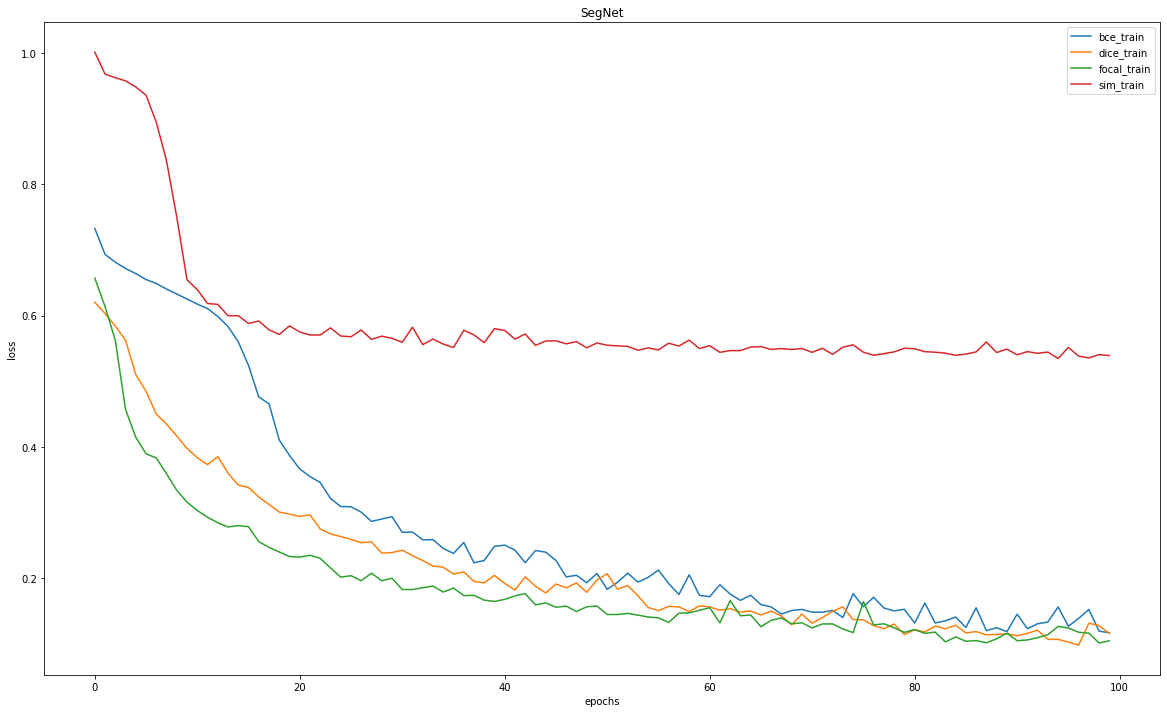

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_SegNet_train_loss, label="bce_train")
plt.plot(dice_SegNet_train_loss, label="dice_train")
plt.plot(foc_SegNet_train_loss, label="focal_train")
plt.plot(sim_SegNet_train_loss, label="sim_train")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("SegNet")
plt.show()

Все лоссы выходят на плато к 100 эпохе. Рассмотрим другие модели...

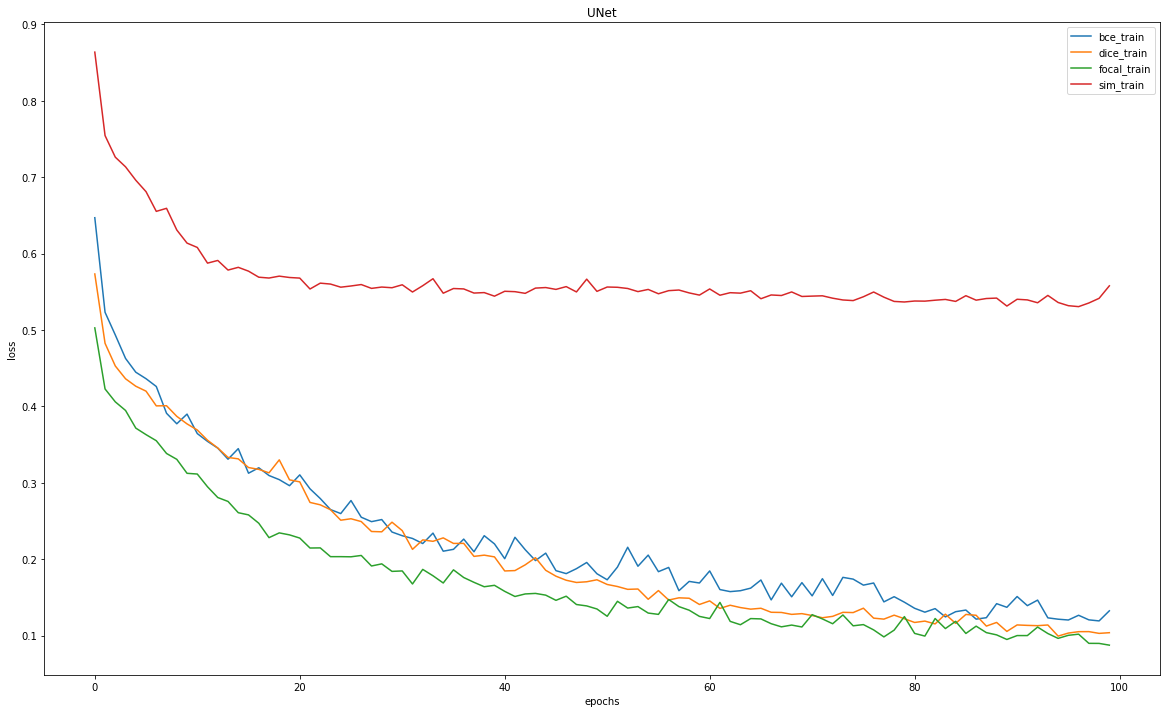

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_unet_train_loss, label="bce_train")
plt.plot(dice_unet_train_loss, label="dice_train")
plt.plot(focal_unet_train_loss, label="focal_train")
plt.plot(sim_unet_train_loss, label="sim_train")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("UNet")
plt.show()

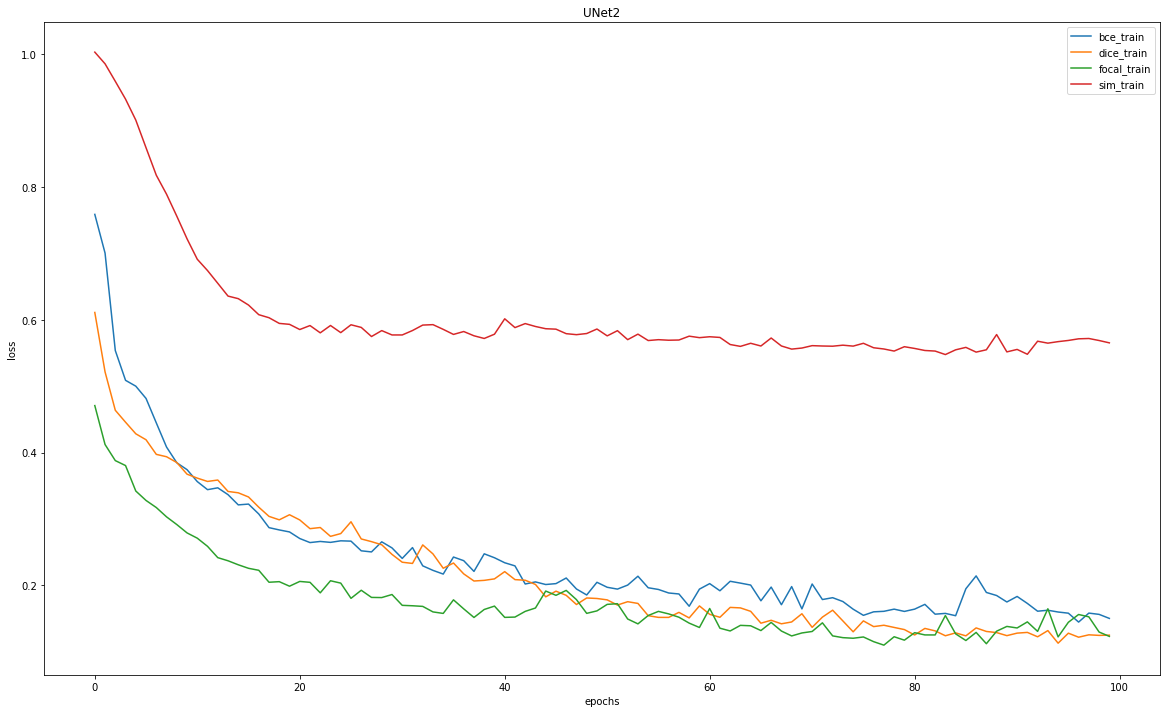

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_unet2_train_loss, label="bce_train")
plt.plot(dice_unet2_train_loss, label="dice_train")
plt.plot(focal_unet2_train_loss, label="focal_train")
plt.plot(sim_unet2_train_loss, label="sim_train")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("UNet2")
plt.show()

Все лоссы на обучающей выборке выходят на плато. Теперь рассмотрим, как изменялся лосс на валидационной выборке.

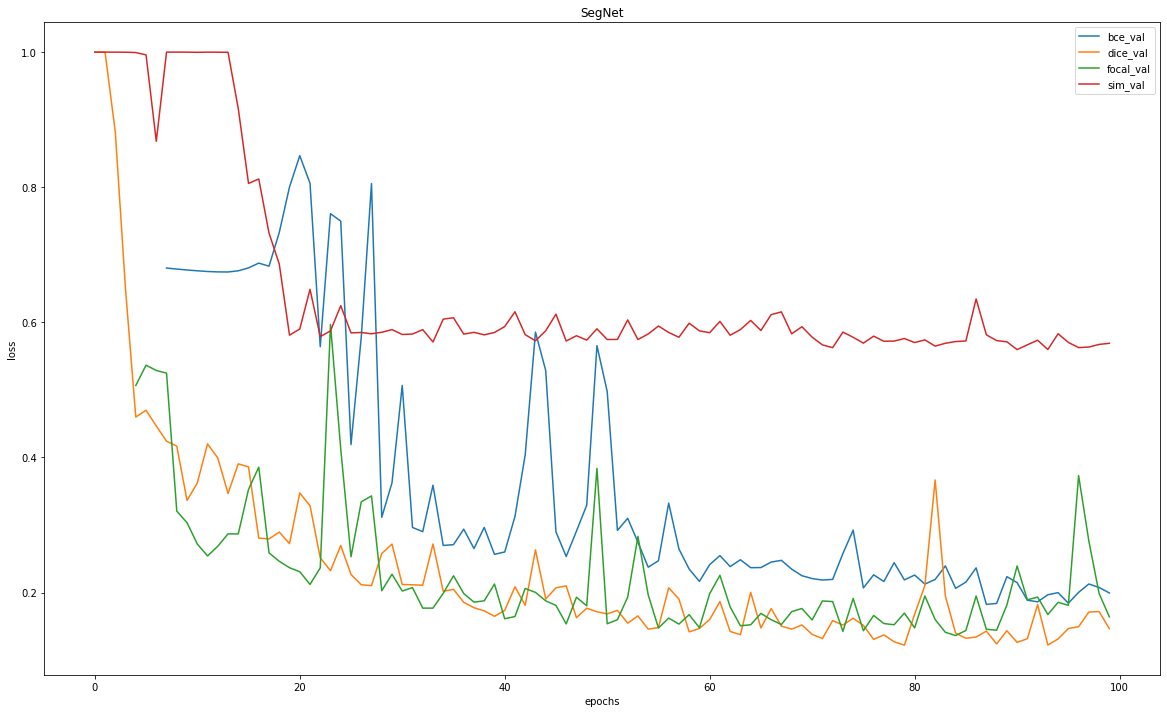

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_SegNet_val_loss, label="bce_val")
plt.plot(dice_SegNet_val_loss, label="dice_val")
plt.plot(foc_SegNet_val_loss, label="focal_val")
plt.plot(sim_SegNet_val_loss, label="sim_val")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("SegNet")
plt.show()

Стабильнее всего себя ведет график bce ssim, при этом модель SegNet имеет наивысший скор именно с bce. Dice и focal при этом к 100 эпохе начинаю вести себя нестабильно, поэтому не стоит делать им больше 80 эпох на такой выборке. Посмотрим как менялся iou для этой модели.

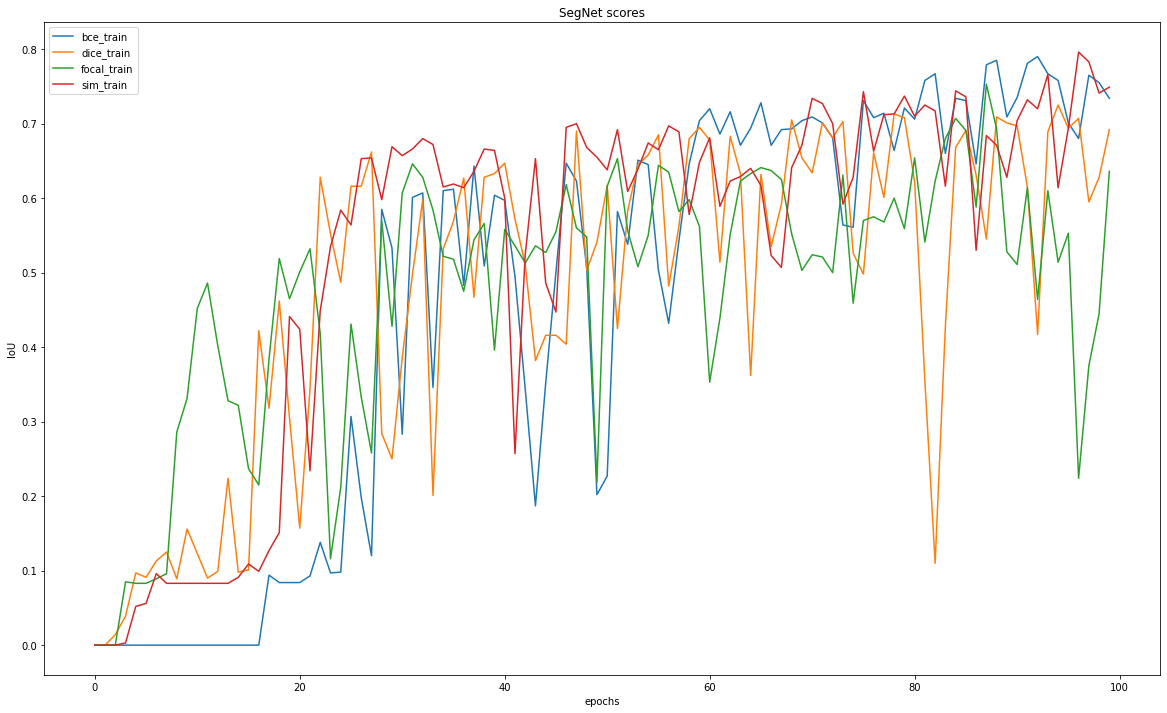

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_SegNet_train_score, label="bce_train")
plt.plot(dice_SegNet_train_score, label="dice_train")
plt.plot(foc_SegNet_train_score, label="focal_train")
plt.plot(sim_SegNet_train_score, label="sim_train")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("IoU")
plt.title("SegNet scores")
plt.show()

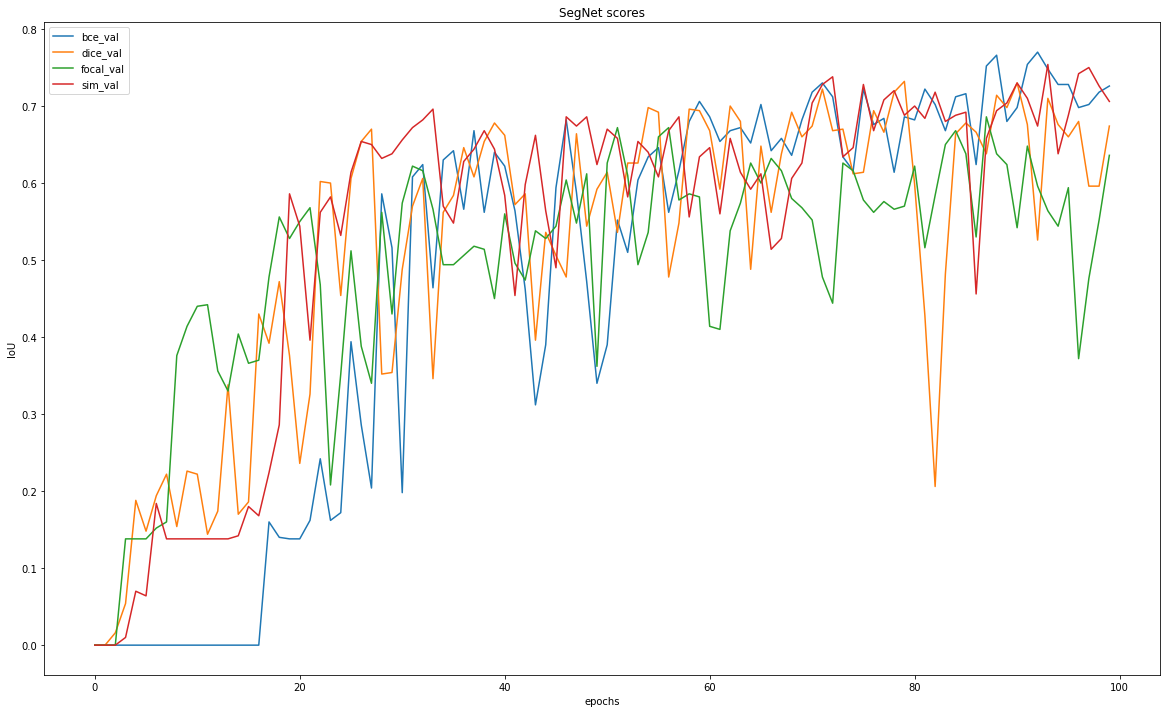

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_SegNet_val_score, label="bce_val")
plt.plot(dice_SegNet_val_score, label="dice_val")
plt.plot(foc_SegNet_val_score, label="focal_val")
plt.plot(sim_SegNet_val_score, label="sim_val")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("IoU")
plt.title("SegNet scores")
plt.show()

Вот тут мы и получаем разгадку низкого скора для Dice и Focal. Модель начала переобучаться к 80 эпохе в то время, как BCE и Sim стабильно росли.

Посмотрим сохраняется ли наша тенденция для других моделей. Посмотрим сразу на валидационный лосс.

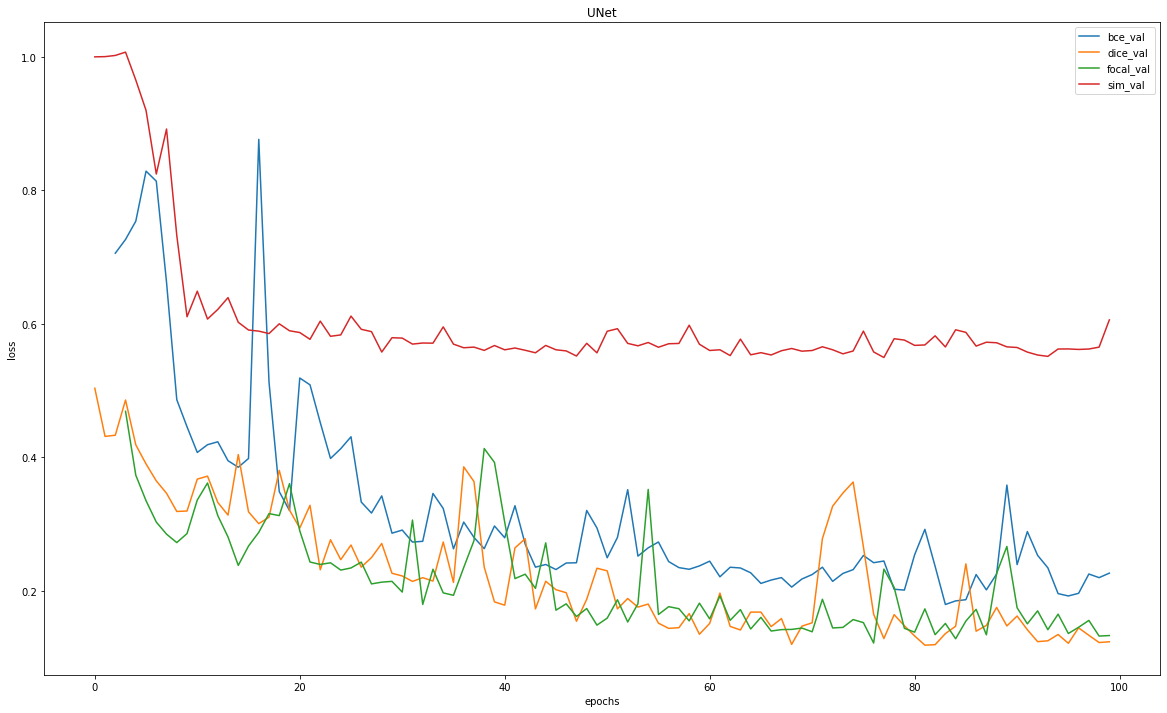

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_unet_val_loss, label="bce_val")
plt.plot(dice_unet_val_loss, label="dice_val")
plt.plot(focal_unet_val_loss, label="focal_val")
plt.plot(sim_unet_val_loss, label="sim_val")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("UNet")
plt.show()

И сразу же посмотрим на IoU для этой модели.

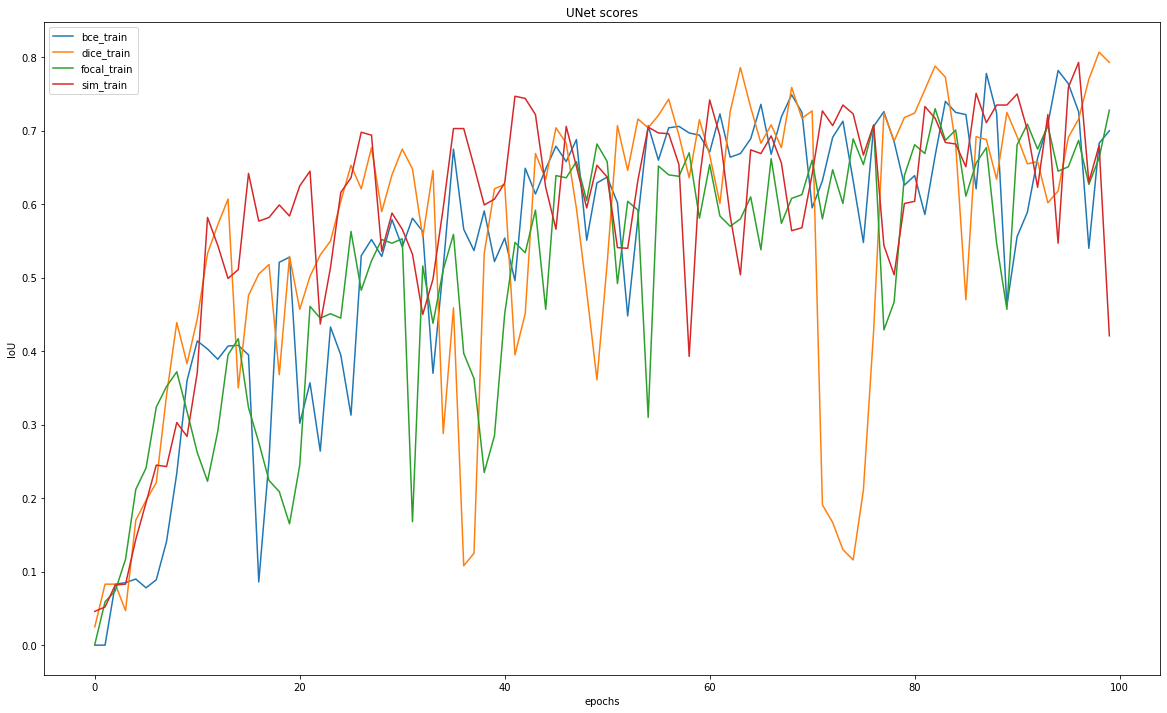

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_unet_train_score, label="bce_train")
plt.plot(dice_unet_train_score, label="dice_train")
plt.plot(focal_unet_train_score, label="focal_train")
plt.plot(sim_unet_train_score, label="sim_train")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("IoU")
plt.title("UNet scores")
plt.show()

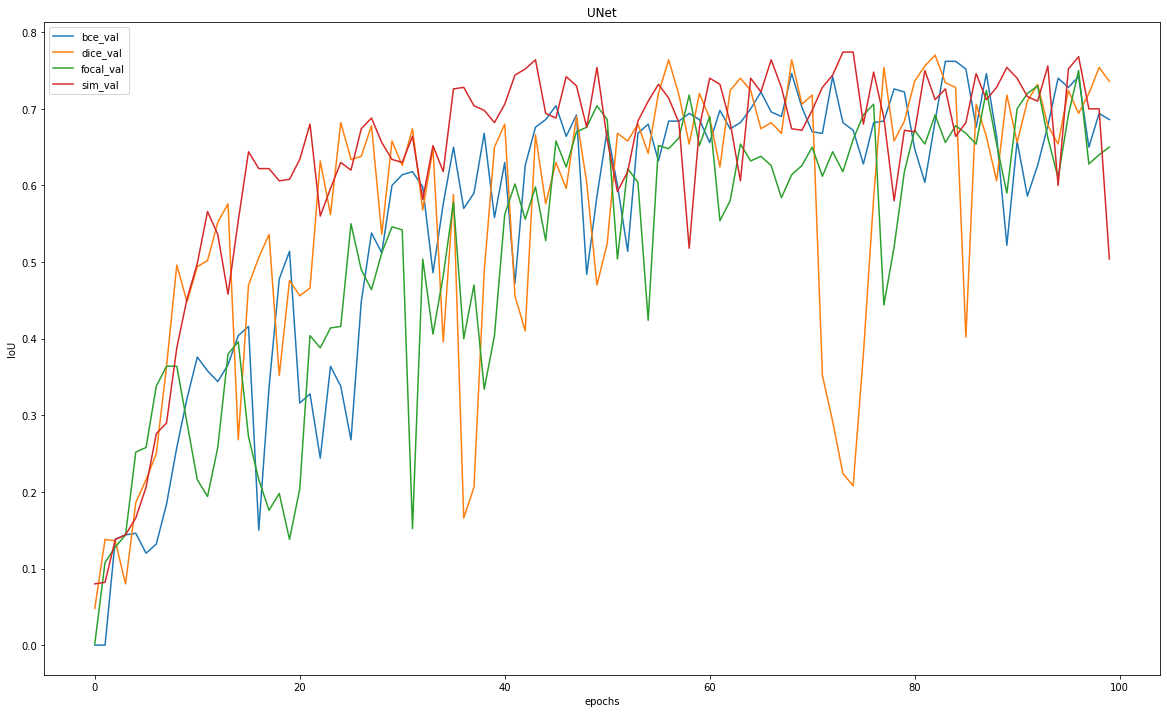

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_unet_val_score, label="bce_val")
plt.plot(dice_unet_val_score, label="dice_val")
plt.plot(focal_unet_val_score, label="focal_val")
plt.plot(sim_unet_val_score, label="sim_val")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("IoU")
plt.title("UNet")
plt.show()

Снова Dice стабильно рос, пока не произошло переобучение снова примерно к ~80 эпохе. При этом Dice получил самый высокий скор. Все остальные модели были более менее стабильны. 

Посмотрим на UNet2

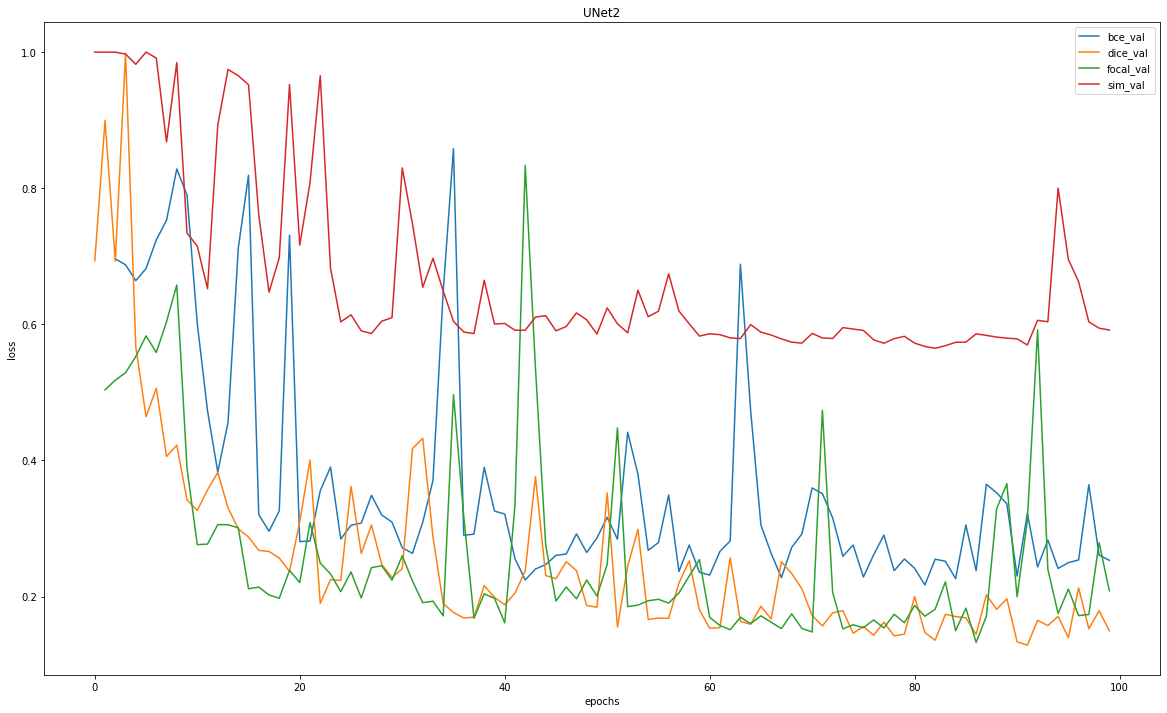

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_unet2_val_loss, label="bce_val")
plt.plot(dice_unet2_val_loss, label="dice_val")
plt.plot(focal_unet2_val_loss, label="focal_val")
plt.plot(sim_unet2_val_loss, label="sim_val")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("UNet2")
plt.show()

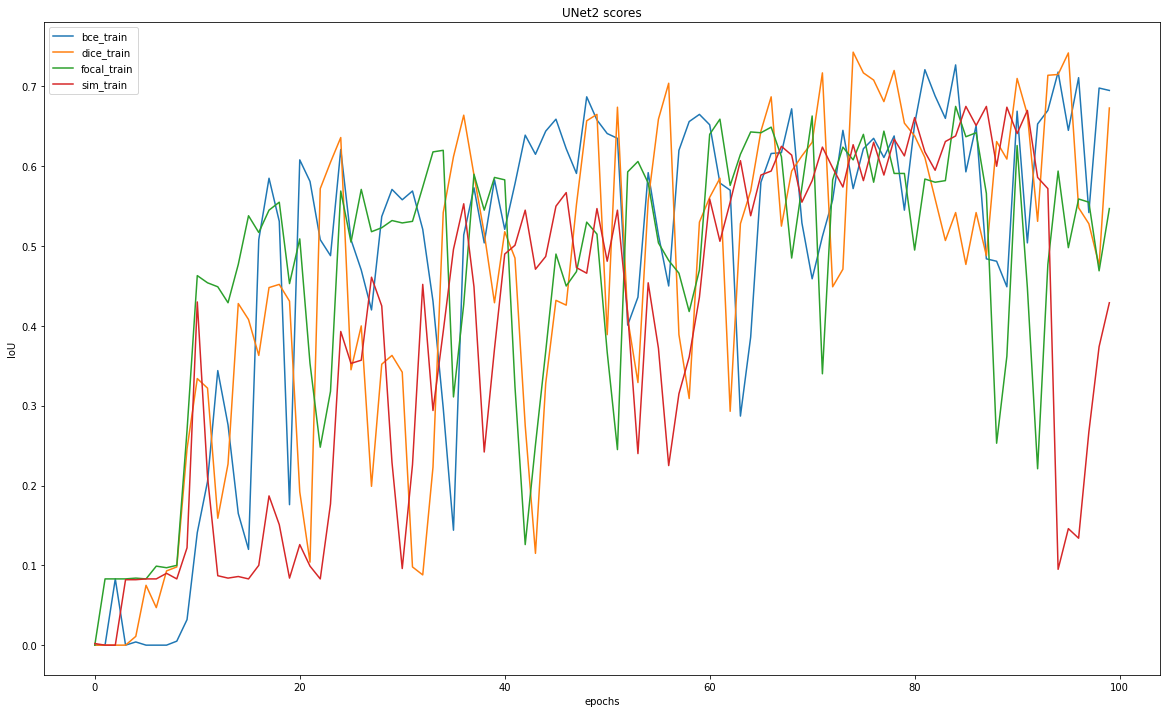

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_unet2_train_score, label="bce_train")
plt.plot(dice_unet2_train_score, label="dice_train")
plt.plot(focal_unet2_train_score, label="focal_train")
plt.plot(sim_unet2_train_score, label="sim_train")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("IoU")
plt.title("UNet2 scores")
plt.show()

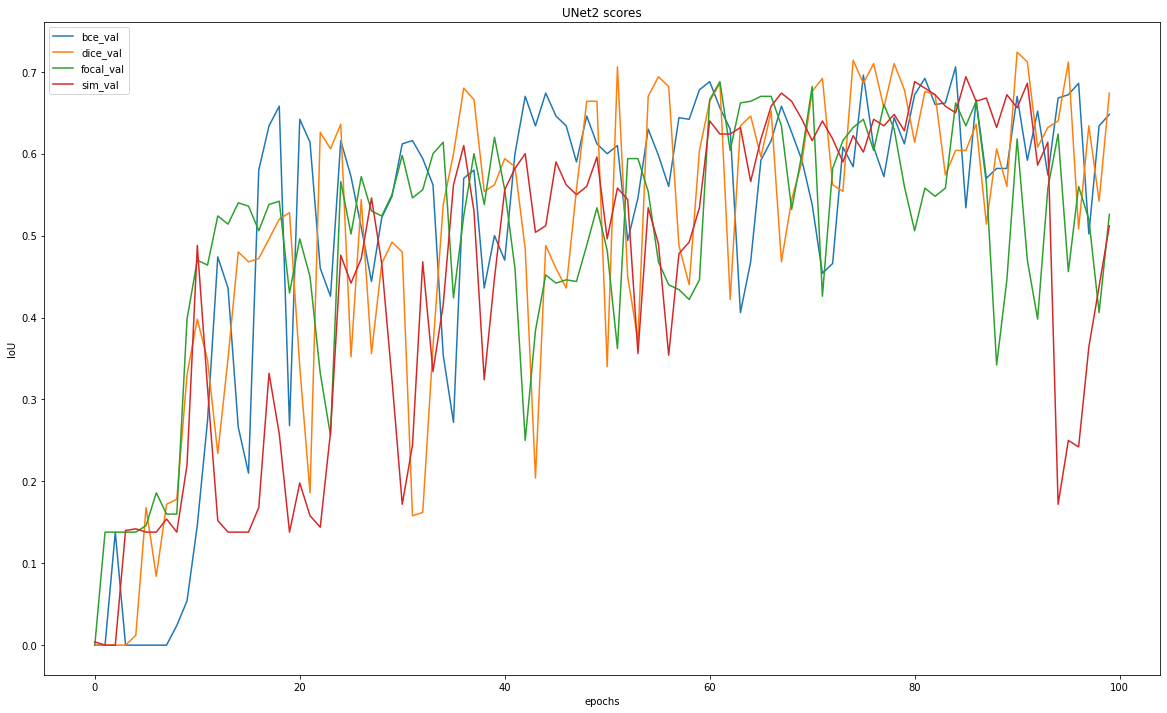

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(bce_unet2_val_score, label="bce_val")
plt.plot(dice_unet2_val_score, label="dice_val")
plt.plot(focal_unet2_val_score, label="focal_val")
plt.plot(sim_unet2_val_score, label="sim_val")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("IoU")
plt.title("UNet2 scores")
plt.show()

В данном случае, модель UNet2 была сильно подвержена переобучению со всеми лоссами, только bce был более менее стабилен, что и доказывается высоким скором к 100 эпохе.

Хотя модель UNet с Dice имеет самый выоский скор среди всех моделей по графику видно, что нейросеть переобучилась и нам следовало бы делать меньше эпох.
SegNet с bce оказалась самой стабильной и при этом имеет отличный скор среди всех моделей.

Заметив на примере с SegNet, что Dice быстро переобучается, мы предположили, что эта тенденция сохраняется на других моделях, что в конце концов оказалось правдой.